# Product Sales Detail 2023
#### I've decided to work with a new dataset containing detailed information about product sales made between 2021-2023. Well, I'm not sure for what company or store this dataset belongs but I was interested in identifying what insights I could obtain by working with this data. So, my curiosity took over me and I decided to work through this dataset. It contains 25158 rows of data with 12 columns, which is pretty big data for me at least. I was eager to identify what insights this dataset might give me and tell about products being sold since 2021. To gain this knowledge out of given data, the techniques such as extracting, cleaning, merging, structuring, vizualizing and predicting were used across dataset.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy.stats import gaussian_kde
import scipy

sns.set_style('darkgrid')

%matplotlib inline

# Downloading DataSet

The dataset I'm working with is located at this link 'https://www.kaggle.com/datasets/davidms8/product-sales-detail'

In [2]:
sales_df = pd.read_excel('./sale_data/DetailSales.xlsx')

Above, I downloaded the content of data saved as Excel file, using .read_excel() function of Pandas library

# Data Preparation and Cleaning

In [3]:
sales_df.shape

(25158, 12)

Dataset contains 25158 rows and 12 columns of data

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25158 entries, 0 to 25157
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        25158 non-null  object 
 1   Orden ID  25158 non-null  object 
 2   Producto  25158 non-null  int64  
 3   Nombre    25158 non-null  object 
 4   Cantidad  25158 non-null  int64  
 5   Precio    25158 non-null  int64  
 6   Total     25158 non-null  int64  
 7   Vendedor  25158 non-null  object 
 8   Fecha     25158 non-null  object 
 9   Usuario   25158 non-null  object 
 10  Creado    25158 non-null  object 
 11  Impuesto  25158 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.3+ MB


There is a general information on the dataset

In [5]:
sales_df.head()

id  Orden ID  Producto           Nombre  Cantidad  Precio  Total  \
0  3b1c962d  e72de456        50  COLOR RAIZ X50G         3     700   2100   
1  037b90c1  52ad5614        50  COLOR RAIZ X50G         4     700   2800   
2  7addf8af  d1c1e8db        50  COLOR RAIZ X50G         6     700   4200   
3  7c6dc67f  c7b6cf8c        50  COLOR RAIZ X50G        12     700   8400   
4  69b6d156  1a248fee        50  COLOR RAIZ X50G         6     700   4200   

   Vendedor                Fecha Usuario               Creado  Impuesto  
0  9f04044e  2021-01-08 00:00:00   ADMIN  2021-12-06 06:41:00      1.19  
1  9f04044e  2021-01-10 00:00:00   ADMIN  2021-12-06 08:11:00      1.19  
2  9f04044e  2021-02-08 00:00:00   ADMIN  2021-12-06 08:56:00      1.19  
3  9f04044e  2021-02-08 00:00:00   ADMIN  2021-12-06 08:59:00      1.19  
4  c5abb107  2021-02-10 00:00:00   ADMIN  2021-12-06 09:35:00      1.19

Above is how the data in general looks like i.e. what columns and types of data are presented. The data is in Spanish. Lets change it to English. 

In [6]:
sales_df = sales_df.rename(columns={'Orden ID':'order_id', 
                         'Producto':'product_id',
                         'Nombre':'product_name',
                         'Cantidad':'sold_amount',
                         'Precio':'unit_price',
                         'Total': 'total_price',
                         'Vendedor':'seller_id',
                         'Fecha':'purchase_date',
                         'Usuario':'user',
                         'Creado':'record_date',
                         'Impuesto':'tax'})

To rename column names from Spanish to English, we use .rename() function setting parameter 'columns' to 'old' and 'new' column names separated by ':'.

In [7]:
sales_df.head()

id  order_id  product_id     product_name  sold_amount  unit_price  \
0  3b1c962d  e72de456          50  COLOR RAIZ X50G            3         700   
1  037b90c1  52ad5614          50  COLOR RAIZ X50G            4         700   
2  7addf8af  d1c1e8db          50  COLOR RAIZ X50G            6         700   
3  7c6dc67f  c7b6cf8c          50  COLOR RAIZ X50G           12         700   
4  69b6d156  1a248fee          50  COLOR RAIZ X50G            6         700   

   total_price seller_id        purchase_date   user          record_date  \
0         2100  9f04044e  2021-01-08 00:00:00  ADMIN  2021-12-06 06:41:00   
1         2800  9f04044e  2021-01-10 00:00:00  ADMIN  2021-12-06 08:11:00   
2         4200  9f04044e  2021-02-08 00:00:00  ADMIN  2021-12-06 08:56:00   
3         8400  9f04044e  2021-02-08 00:00:00  ADMIN  2021-12-06 08:59:00   
4         4200  c5abb107  2021-02-10 00:00:00  ADMIN  2021-12-06 09:35:00   

    tax  
0  1.19  
1  1.19  
2  1.19  
3  1.19  
4  1.19

Now, we have column names in English. Good.

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25158 entries, 0 to 25157
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25158 non-null  object 
 1   order_id       25158 non-null  object 
 2   product_id     25158 non-null  int64  
 3   product_name   25158 non-null  object 
 4   sold_amount    25158 non-null  int64  
 5   unit_price     25158 non-null  int64  
 6   total_price    25158 non-null  int64  
 7   seller_id      25158 non-null  object 
 8   purchase_date  25158 non-null  object 
 9   user           25158 non-null  object 
 10  record_date    25158 non-null  object 
 11  tax            25158 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.3+ MB


The type of certain columns is not appropriate to the column names, namely 'purchase_date' and 'record_date', so we gonna change them.

In [9]:
sales_df['purchase_date'] = pd.to_datetime(sales_df['purchase_date'], dayfirst=True)
sales_df['record_date'] = pd.to_datetime(sales_df['record_date'], dayfirst=True)

Above we converted the object type data in columns 'purchase_date' and 'record_date' to datetime64 since these values are not just strings but dates. Also, I set parameter dayfirst=True to say that the first number appeared in these columns is the day.

In [10]:
sales_df.user.unique()

array(['ADMIN'], dtype=object)

The column 'user' consists of only the value 'ADMIN', which means this column doesn't bring us any valuable information. So, better to reduce the number of columns and drop it.

In [11]:
sales_df = sales_df.drop(columns=['user'])

We drop the column 'user' using the .drop() function

Since we want to find patterns in purchase of certain products at specific dates, we need to separate the 'purchase_date' column to 'puchase_year','purchase_month' and 'purchase_day'.

In [12]:
sales_df['purchase_year'] = sales_df['purchase_date'].dt.year
sales_df['purchase_month'] = sales_df['purchase_date'].dt.month
sales_df['purchase_day'] = sales_df['purchase_date'].dt.day

We extract the year, month, and day parts of the 'purchase_date' column using pd.DataFrame.dt.{year,month,day} and assign them to new columns.

In [13]:
sales_df = sales_df.drop(columns=['purchase_date'], axis=1)

Since we've created new three columns, we do not need 'purchase_date' column anymore, so we drop this column using .drop() function setting the parameter axis=1.

In [14]:
sales_df = sales_df[['id', 'order_id', 'product_id', 'product_name', 'sold_amount',
       'unit_price', 'total_price', 'seller_id', 'purchase_year', 'purchase_month', 
       'purchase_day', 'record_date', 'tax']]

To set newly created three columns in place of previous column, we reset the columns' order using [  ] inside the sales_df[  ].

The dataset is not sorted and it is inconvenient to work with unsorted data. So, lets sort the data based on the newly created columns in ascending order.

In [15]:
sales_df = sales_df.sort_values(by=['purchase_year','purchase_month','purchase_day'], ascending=True)

Above we used .sort_values() function and set parameter by=['purchase_year','purchase_month','purchase_day'] to sort by these 3 columns, ascending=True means sorting data in ascending order.

In [16]:
sales_df.to_excel('./sale_data/sales.xlsx',index=False)

Above we've saved the English version of our dataset to a new Excel file using .to_excel() function. Since we don't want a new index to appear as a new column in the dataset, we set index=False.

In [17]:
sales_df = pd.read_excel('./sale_data/sales.xlsx', parse_dates=True)

We've downloaded a new English version of our dataset using .read_excel() function

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25158 entries, 0 to 25157
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              25158 non-null  object        
 1   order_id        25158 non-null  object        
 2   product_id      25158 non-null  int64         
 3   product_name    25158 non-null  object        
 4   sold_amount     25158 non-null  int64         
 5   unit_price      25158 non-null  int64         
 6   total_price     25158 non-null  int64         
 7   seller_id       25158 non-null  object        
 8   purchase_year   25158 non-null  int64         
 9   purchase_month  25158 non-null  int64         
 10  purchase_day    25158 non-null  int64         
 11  record_date     25158 non-null  datetime64[ns]
 12  tax             25158 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 2.5+ MB


It seems there are no Null values in the dataset. It makes our work more easier. In general we have columns and 25158 rows of data.

In [19]:
len(sales_df.id.unique()) == sales_df.shape[0]

True

All IDs assigned to products are unique. It makes sense to assign 'id' column values as a new index for our data. 

In [20]:
sales_df = sales_df.set_index(keys='id')

In [21]:
sales_df

order_id  product_id            product_name  sold_amount  \
id                                                                    
3b1c962d  e72de456          50         COLOR RAIZ X50G            3   
fe479b28  e72de456          51            ACHIOTE X40G            3   
1467a16c  cd4af444          53     CANELA ASTILLA X20G            6   
b7793441  e72de456          54         SAL DE AJO X20G            3   
4d52e36f  cd4af444          61         UVAS PASAS X40G            6   
...            ...         ...                     ...          ...   
4f84b7cd  b477af5d         234  VINAGRE BLANCO X500 ML            2   
4bac3816  c3a443e9         238      FINAS HIERBAS X20G            3   
1f041122  b4f6b156         238      FINAS HIERBAS X20G           10   
199cc5f8  b33c8dda         238      FINAS HIERBAS X20G            6   
df70bf9d  aa0e8067         224             MIEL X140ML            4   

          unit_price  total_price seller_id  purchase_year  purchase_month  \
id                                                                           
3b1c962d         700         2100  9f04044e           2021               1   
fe479b28         850         2550  9f04044e           2021               1   
1467a16c        2800        16800  c5abb107           2021               1   
b7793441         850         2550  9f04044e           2021               1   
4d52e36f         920         5520  c5abb107           2021               1   
...              ...          ...       ...            ...             ...   
4f84b7cd        1600         3200  9f04044e           2023               3   
4bac3816         900         2700  9f04044e           2023               3   
1f041122         900         9000  c5abb107           2023               3   
199cc5f8         900         5400  9f04044e           2023               3   
df70bf9d        1600         6400  9f04044e           2023               3   

          purchase_day         record_date   tax  
id                                                
3b1c962d             8 2021-12-06 06:41:00  1.19  
fe479b28             8 2021-12-06 07:08:00  1.19  
1467a16c             8 2021-12-06 08:02:00  1.19  
b7793441             8 2021-12-06 07:05:00  1.19  
4d52e36f             8 2021-12-06 07:26:00  0.00  
...                ...                 ...   ...  
4f84b7cd            14 2023-03-15 00:27:50  1.19  
4bac3816            14 2023-03-14 14:10:47  1.19  
1f041122            14 2023-03-14 15:19:28  1.19  
199cc5f8            14 2023-03-14 15:53:20  1.19  
df70bf9d            15 2023-03-15 14:40:05  1.19  

[25158 rows x 12 columns]

Good. Now, we have new indices. Let's look through other columns and check what we can find out.

In [22]:
'''def fix_name(name, name_list):
    max_score= 0
    max_name = name
    for n in name_list:
        score = fuzz.ratio(name, n)
        if score > max_score:
            max_score = score
            max_name = n
    return max_name
fixed_names = [fix_name(n, sales_df.product_name.tolist()) for n in sales_df.product_name.tolist()]''';

# Exploratory Analysis

Let's work though the dataset and see what insights this data might bring us about the sales, date of orders, sold amount, unit prices, total sale amounts, unit of orders and sellers. It will be interesting to identify which products has been the most popular ones since 2021? Or which products were the least popular? What was the highest number of sales made at each year and on each month? Is there any relation, tendency or correlation between some of the data provided? What about sellers: who has sold the highest number of products so far or at each year, and predict how their efficiency will behave in the next 5 years? It is interesting to identify in what direction the amount of sales were directed to: upward or downward? And other related questions might arise during our analysis. Lets start.

## How many products were sold (monthly count) between 2021-2023? 

In [23]:
amount_sold_by_month_df = sales_df.groupby(['purchase_year','purchase_month'],as_index=False)['sold_amount'].sum()

We create a new dataframe grouping the amount of sold products by columns 'purchase_year' and 'purchase_month' using .groupby() function, setting the parameter as_index=False.

In [24]:
amount_sold_by_month_df

purchase_year  purchase_month  sold_amount
0            2021               1          256
1            2021               2          485
2            2021               3          859
3            2021               4          954
4            2021               5         1405
5            2021               6          550
6            2021               7         1761
7            2021               8         5067
8            2021               9         5245
9            2021              10         5464
10           2021              11         5960
11           2021              12         5304
12           2022               1         9086
13           2022               2         7035
14           2022               3         8193
15           2022               4         5621
16           2022               5         7787
17           2022               6         7632
18           2022               7         7611
19           2022               8         7619
20           2022               9         6238
21           2022              10         6133
22           2022              11         9121
23           2022              12        12918
24           2023               1         9491
25           2023               2         6946
26           2023               3         3817

Above illustrated the table of amount of products sold at each month grouped by year.

In [25]:
amount_sold_by_month_df.purchase_month = pd.to_datetime(amount_sold_by_month_df.purchase_month, format='%m').dt.month_name()
Months = amount_sold_by_month_df.purchase_month.unique()
amount_sold_by_month_df.purchase_month = pd.Categorical(amount_sold_by_month_df.purchase_month, categories=Months, ordered=True)

In the above code lines, we are converting each month to their corresponding names and changing the type of 'purchase_month' column to category by setting 'categories' to the list 'Months', based on the created list of month names, and assigning ordered=True to keep the order of month names as in the 'Months' list. 

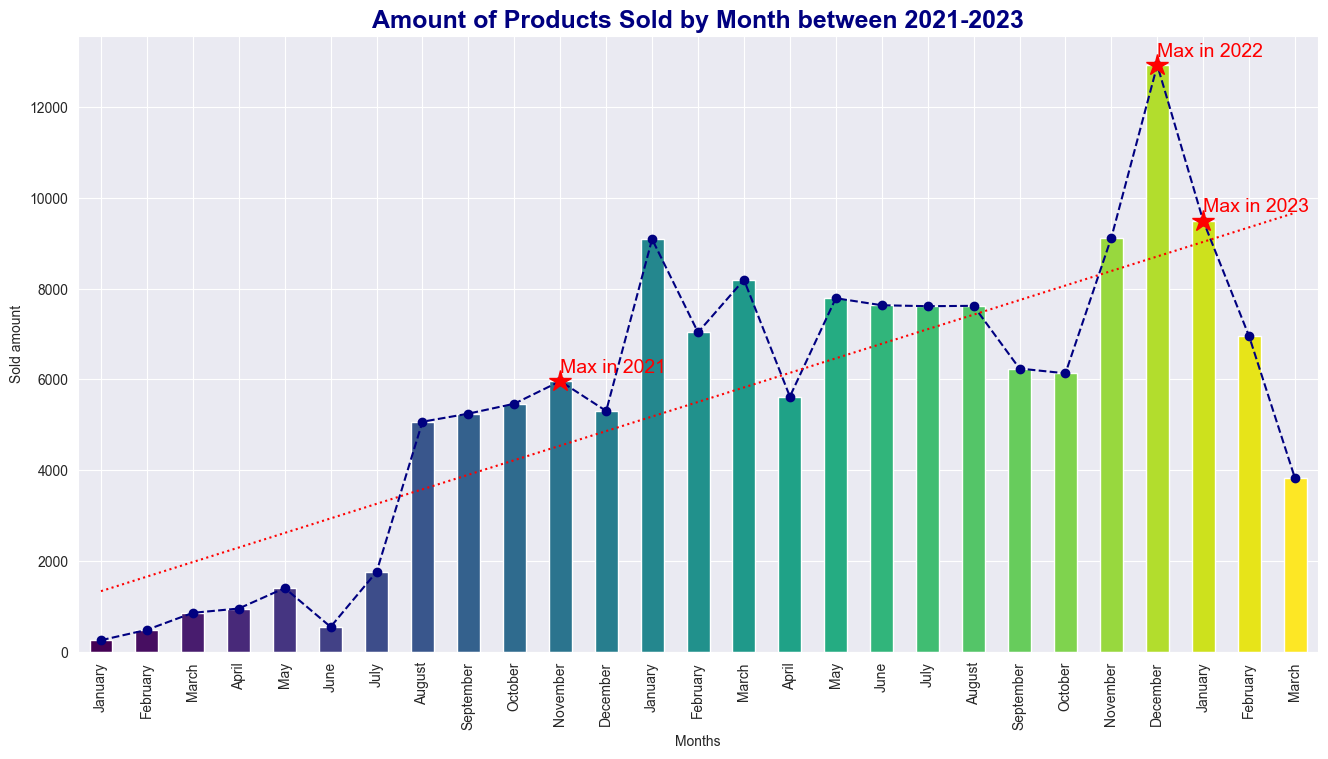

In [26]:
# Getting colormap names 'viridis'
colors = plt.get_cmap('viridis')

# Taking values of slop, interseption and other parameters using linregress() function of scipy library
k, y_, r, p, err = scipy.stats.linregress(amount_sold_by_month_df.index, amount_sold_by_month_df.sold_amount)

# Calculating the new y values based on slope and interception 
funct = k*amount_sold_by_month_df.index + y_

# Plotting a bar chart
amount_sold_by_month_df.plot.bar(x='purchase_month', y='sold_amount', color=colors(np.linspace(0,1,len(amount_sold_by_month_df.purchase_month))), figsize=(16,8), legend=False)

# Plotting a line chart that passes through the top points of each bar
plt.plot(amount_sold_by_month_df.index, amount_sold_by_month_df['sold_amount'], 
         marker='o', 
         linestyle='--', 
         color='navy')

# Plotting the regression line
plt.plot(amount_sold_by_month_df.index, funct, linestyle=':', color='red')

# Setting title and labels
plt.title('Amount of Products Sold by Month between {}-{}'.format(amount_sold_by_month_df.purchase_year.unique()[0], amount_sold_by_month_df.purchase_year.unique()[-1]),
          fontdict={'fontname':'Arial','fontsize':18,'fontweight':'bold','color':'navy'})
plt.ylabel('Sold amount')
plt.xlabel('Months')

for year in amount_sold_by_month_df.purchase_year.unique():
    
    # Creating a new DataFrame with a unique year value
    df_ = amount_sold_by_month_df.loc[amount_sold_by_month_df.purchase_year==year]
    
    # Taking the highest value in column 'sold_amount'
    max_amount = amount_sold_by_month_df.loc[df_.sold_amount.idxmax(),'sold_amount']
    
    # Taking the index value of corresponding max value in the DataFrame
    index_max = df_.sold_amount.idxmax()

    # Plotting points with the hihgest values
    plt.plot(index_max, max_amount, 
             marker='*',
             markersize=16, 
             color='red'
             )
    
    # Adding texts above the highest points
    plt.text(index_max,
             max_amount+200,
             'Max in {}'.format(year),
             fontdict={'fontname':'Arial','fontsize':14,'fontweight':'light','color':'red'}
             )
# Rotating x values to 90 degree
plt.xticks(rotation=90);

Above shown the overall trend of products sold between 2021 and 2023. We clearly see that between 2021 and 2022 the production sale has raised to significant amount, but beginning of 2023 was not favorable since we see a huge drop in amount of products sold. There are 3 major regions in the graph that draw the attention:
* 1st - starting from June of 2021 till the end of 2021, the amount of products sold has raised for approximately 10 folds i.e. more than 1000% increase. Maximum number of products sold in 2021 corresponds to November (11th). 
* 2nd - starting from October of 2022 till the end of 2022, the amount of products sold saw a huge surge making more than 200% increase. Maximum number of products sold in 2022 obtained in December (12th).
* 3rd - beginning of 2023 saw a huge drop in amount of sales, namely almost 300% fall in sale. For now, it is the huge drop since the beginning of 2021. For 2023, the highest number of products sold was observed on January.
* However, based on our prediction, going forward the number of sold products might increase and as in the last two years, the highest sale might be anticipated by the end of the year. Since for the last two years the number of sales has always been attaining the highest numbers approximately to the end of the year.
* Red dot line shows that since 2021 the number of sales were gradually increasing and based on its behaviour, we can say the number of sales still might surge achieving new highs in the next 5 to 10 years. 

In [27]:
'''fig, axs = plt.subplots(nrows=len(amount_by_month_df.purchase_year.unique()), ncols=1, figsize=(12,20))
cmap = plt.get_cmap('viridis')
for i,year in enumerate(amount_by_month_df.purchase_year.unique()):
    df = amount_by_month_df[amount_by_month_df.purchase_year==year]
    df.plot.bar(x='purchase_month', y='sold_amount', align='center', legend=False, color=cmap(np.linspace(0,1,len(df.purchase_month))), ax=axs[i])
    axs[i].plot(df['purchase_month']-1, df['sold_amount'], marker='o', linestyle='--', color='navy')
    axs[i].set_title('Amount of Products Sold by Month in {}'.format(year),
                     fontdict={'fontname':'Arial','fontsize':18,'fontweight':'bold','color':'navy'})
    axs[i].set_ylabel('Sold amount')
    axs[i].set_xlabel('Months')
    axs[i].tick_params(axis='x',rotation=360)''';

# Now, Lets check what days of the month the highest number of purchases were made?

In [28]:
purchase_made_by_day_df = sales_df.groupby(['purchase_month'], group_keys=True)['purchase_day'].apply(lambda x: x)

We create a Series by grouping the dataset by the column 'purchase_month', taking all the occurences of days purchases were made by using .apply() function to 'purchase_day' column.

In [29]:
purchase_made_by_day_df

purchase_month  id      
1               3b1c962d     8
                fe479b28     8
                1467a16c     8
                b7793441     8
                4d52e36f     8
                            ..
12              ed22d3bc    31
                bbc4406c    31
                c330b11f    31
                9b184ebf    31
                2047432f    31
Name: purchase_day, Length: 25158, dtype: int64

We got MultiIndexed rows made of 'purchase_month' and 'id'

In [30]:
purchase_made_by_day_df = purchase_made_by_day_df.reset_index()

We would like to reset the indices, converting Series to DataFrame

In [31]:
purchase_made_by_day_df

purchase_month        id  purchase_day
0                   1  3b1c962d             8
1                   1  fe479b28             8
2                   1  1467a16c             8
3                   1  b7793441             8
4                   1  4d52e36f             8
...               ...       ...           ...
25153              12  ed22d3bc            31
25154              12  bbc4406c            31
25155              12  c330b11f            31
25156              12  9b184ebf            31
25157              12  2047432f            31

[25158 rows x 3 columns]

Above is the DataFrame we took  from above operation

In [32]:
purchase_made_by_day_df = purchase_made_by_day_df.drop(columns='id')

Since we are not interested in 'id' column, we drop it, using .drop() function.

In [33]:
purchase_made_by_day_df = purchase_made_by_day_df.sort_values(by=['purchase_month','purchase_day'], ascending=True)

We need to sort the values to avoid further alignment problems. To do this we use .sort_values() function, sorting by two columns 'purchase_month' and 'purchase_day' in ascending order.

In [34]:
purchase_made_by_day_df.purchase_month = pd.to_datetime(purchase_made_by_day_df.purchase_month, format='%m').dt.month_name()
Months = purchase_made_by_day_df.purchase_month.unique()
purchase_made_by_day_df.purchase_month = pd.Categorical(purchase_made_by_day_df.purchase_month, categories=Months, ordered=True)

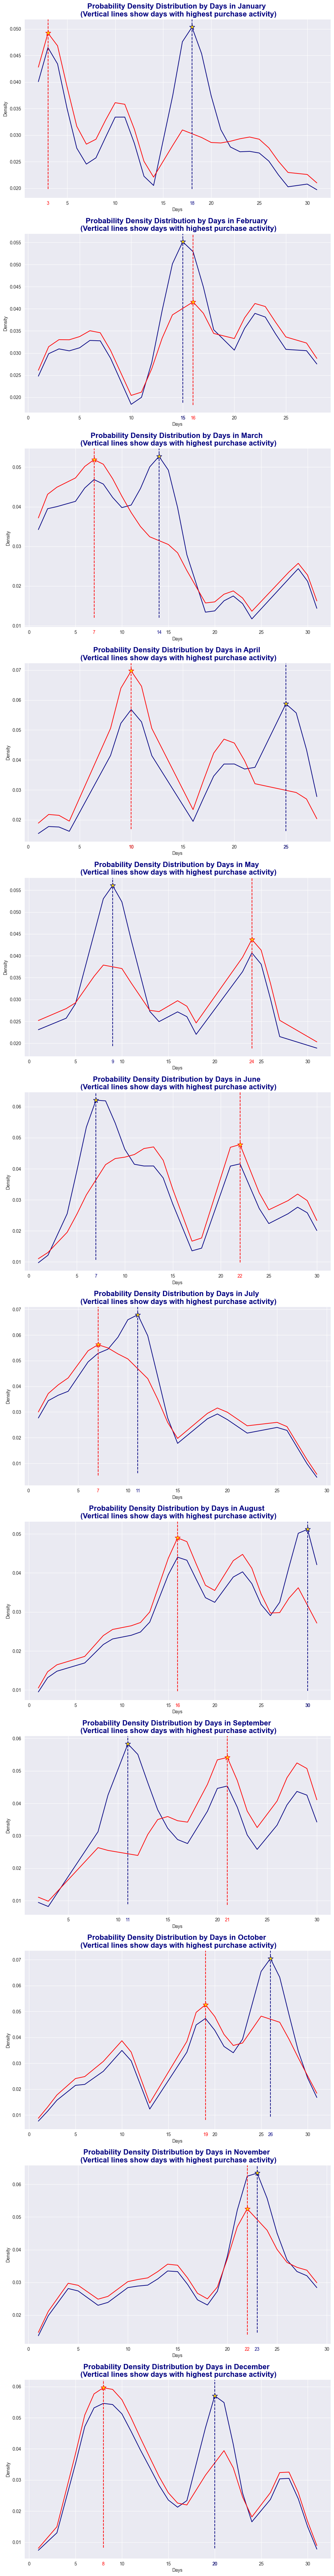

In [35]:
# We use plt.subplots() and set nrows to number of month (from 1 to 12) 
fi,axs = plt.subplots(nrows=len(purchase_made_by_day_df.purchase_month.unique()), ncols=1, figsize=(12,100))

# We need to use a for loop and enumerate() to get the index and value of unique months to work with each of them separately
for i, month in enumerate(purchase_made_by_day_df.purchase_month.unique()):
    
    # We take the values of column 'purchase_day' only working with the particular month and save it in 'data'
    data = purchase_made_by_day_df.loc[purchase_made_by_day_df.purchase_month==month, 'purchase_day']
    
    # We need to work with Series so as the data we took values of data, setting the index from 0 to the number
    # of elements in 'data', naming the Series 'purchase_day'
    data = pd.Series(data=data.values, index=np.arange(0,len(data)), name='purchase_day')

    # We create an object with estimated pdf values of 'data' 
    density = gaussian_kde(data)

    # Next, we refer to pdf values using density(data) and take the index of corresponding max pdf value
    # using .argmax(). This index is passed to 'data' as the coordinate to take the value corresponding to
    # this index and save it in x_max_density.
    x_max_density = data[density(data).argmax()]

    # We need to find the next purchase day with the second highest number of purchase activity
    # To do this we first create a copy of previous Series
    data2 = data.copy()
    
    # Since we want to find the value corresponding to the second highest pdf value, then obviously we need
    # eliminate the highest one from the Series using .drop() function, dropping all the indices corresponding
    # max value from the Series and saving it in data2
    data2 = data2.drop(index=data2[data2.values == x_max_density].index)
    
    # Since we removed the rows from data2, the indices also were removed, now to avoid alignment problems
    # we renew the indices, taking the left values of data2.
    data2 = pd.Series(data=data2.values, index=np.arange(0,len(data2)), name='purchase_day')

    # We create another density2 object with estimated pdf values of new data
    density2 = gaussian_kde(data2)

    # we find the value in Series that corresponds to the index of the highest pdf value in density(data2) 
    x_max2_density = data2[density2(data2).argmax()]
    
    # We convert the Series to DataFrame using .to_frame()
    data = data.to_frame()
    data2 = data2.to_frame()

    # We draw the line graph setting purchase_day values on x-axis, and its density values on y-axis
    axs[i].plot(data.purchase_day.unique(), density(data.purchase_day.unique()), color='navy')
    axs[i].plot(data2.purchase_day.unique(), density2(data2.purchase_day.unique()), color='red')

    # We draw the vertical line that passes through the purchase day with the highest purchase activity
    axs[i].axvline(x_max_density, density(x_max_density), color='navy', linestyle='--')
    axs[i].axvline(x_max2_density, density2(x_max2_density), color='red', linestyle='--')
    
    # We highlight the coordinate x-y that corresponds to the highest pdf value, shaping it with 'star' marker
    axs[i].plot(x_max_density, density(x_max_density), color='gold', markeredgecolor='navy', marker='*', markersize=12)
    axs[i].plot(x_max2_density, density2(x_max2_density), color='gold', markeredgecolor='red', marker='*', markersize=12)
    
    # We add the purchase day labels on x-axis below the vertical line
    axs[i].text(x_max_density, -0.018, '{}'.format(x_max_density), fontdict={'color':'navy'}, ha='center', va='top', transform=axs[i].get_xaxis_transform())
    axs[i].text(x_max2_density, -0.018, '{}'.format(x_max2_density), fontdict={'color':'red'}, ha='center', va='top', transform=axs[i].get_xaxis_transform())
    
    # Then we set title, x_label and y_label
    axs[i].set_title('Probability Density Distribution by Days in {} \n (Vertical lines show days with highest purchase activity)'.format(month),
                     fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    axs[i].set_xlabel('Days')
    axs[i].set_ylabel('Density');

Above graphs illustrate the days of month with the purhcase activity illustrated as Probability Density Function values separated by each month. Between January of 2021 and March of 2023, the following results should be pointed out:
* In January: the highest purchase activity was observed in 3rd and 18th days.
* In February: the highest purchase activity was observed in 15th and 16th days.
* In March: the highest purchase activity was observed in 7th and 14th days.
* In Aptil: the highest purchase activity was observed in 10th and 25th days.
* In May: the highest purchase activity was observed in 9th and 24th days.
* In June: the highest purchase activity was observed in 7th and 22nd days.
* In July: the highest purchase activity was observed in 7th and 11th days.
* In August: the highest purchase activity was observed in 16th and 30th days.
* In September: the highest purchase activity was observed in 11th and 21st days.
* In October: the highest purchase activity was observed in 19th and 26th days.
* In November: the highest purchase activity was observed in 22nd and 23rd days.
* In December: the highest purchase activity was observed in 8th and 20th days.

In [36]:
'''density = gaussian_kde(data)
x_max_density = data[density(data).argmax()]
data.reset_index().drop('index', inplace=True)
plt.plot(data.purchase_month.unique(), density(data.purchase_month.unique()))
plt.axvspan(x_max_density - x_max_density*0.1, x_max_density, color='grey', alpha=0.3)
plt.xlabel('Months')
plt.ylabel('Density')''';

# Lets identify how many products were sold at each purchase day of each month.

In [37]:
amount_sold_by_day_df = sales_df.groupby(['purchase_month','purchase_day'], as_index=False)['sold_amount'].sum()

To identify how many products were sold at each day for each month, we group the dataset by columns 'purchase_month' and 'purchase_day', summing the values of 'sold_amount' based on these columns.

In [38]:
amount_sold_by_day_df

purchase_month  purchase_day  sold_amount
0                 1             2         1176
1                 1             3         1855
2                 1             4          875
3                 1             5           83
4                 1             6          371
..              ...           ...          ...
282              12            27         1150
283              12            28          980
284              12            29          498
285              12            30          164
286              12            31          162

[287 rows x 3 columns]

Above is how the new DataFrame looks like.

In [39]:
amount_sold_by_day_df.purchase_month = pd.to_datetime(amount_sold_by_day_df.purchase_month, format='%m').dt.month_name()
Months = amount_sold_by_day_df.purchase_month.unique()
amount_sold_by_day_df.purchase_month = pd.Categorical(amount_sold_by_day_df.purchase_month, categories=Months, ordered=True)

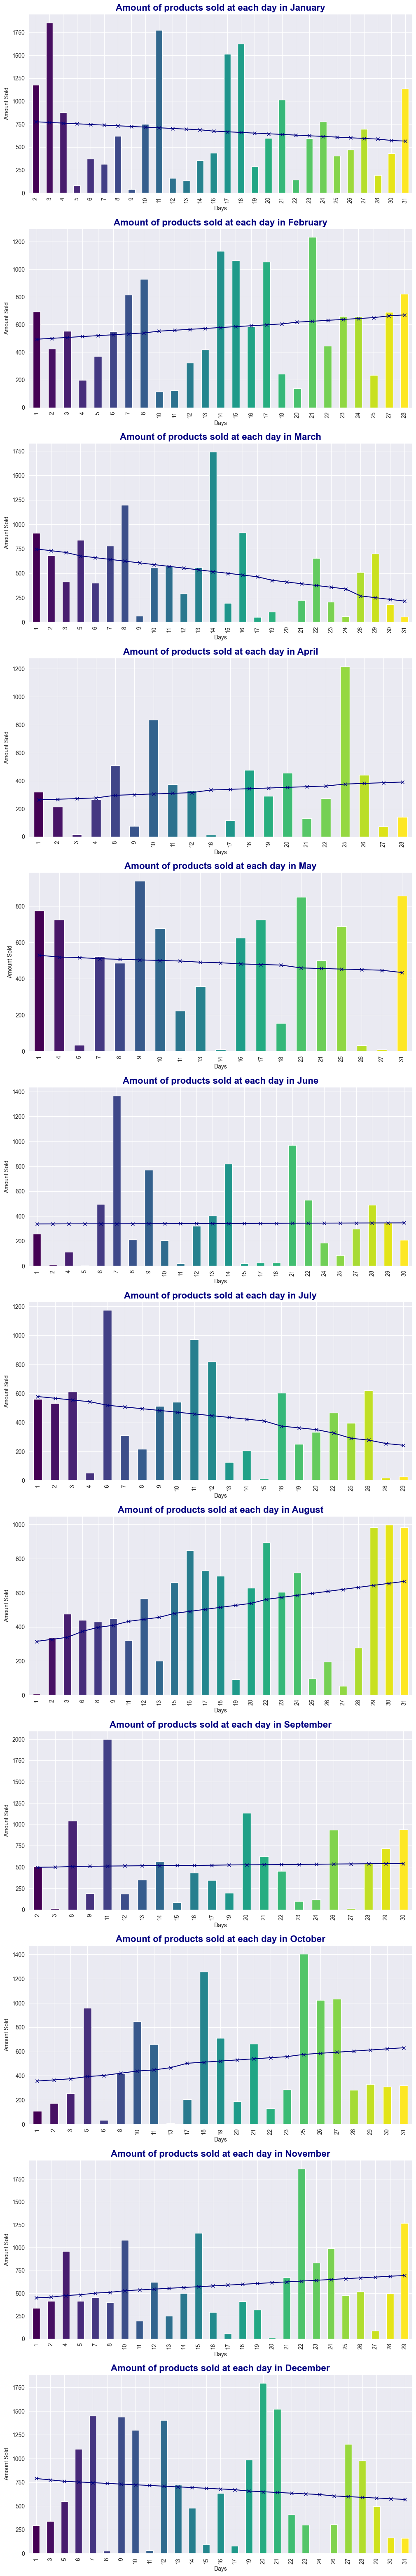

In [40]:
fig, axs = plt.subplots(nrows=len(amount_sold_by_day_df.purchase_month.unique()), ncols=1, figsize=(12,80))
colormap = plt.get_cmap('viridis')

for i, month in enumerate(amount_sold_by_day_df.purchase_month.unique()):
    df = amount_sold_by_day_df[amount_sold_by_day_df.purchase_month==month]
    df = df.reset_index()
    slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(df.purchase_day, df.sold_amount)
    funct = slope*df.purchase_day+intercept
    funct = pd.Series(funct, name='y_pred')
    df = pd.concat([df, funct], axis=1)

    ax = df.plot.bar(x='purchase_day', 
                     y='sold_amount', 
                     color=colormap(np.linspace(0,1,len(df.purchase_day.unique()))),
                     legend=False,
                     ax=axs[i])
    
    ax.plot(df.index, df['y_pred'], marker='x', color='navy')

    ax.set_title('Amount of products sold at each day in {}'.format(month), 
                 fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    ax.set_ylabel('Amount Sold')
    ax.set_xlabel('Days')


Based on the above graphs following insights can be drawn:
* Based on the behaviour of the graph, the number of sales has been decreasing gradually on January, March, May, July and December.
* While it's been increasing on February, April, August, October and November.
* There was a stagnation-like periods e.g. on June and September.
* Interestingly, there's been a downward trend preceded by upward trend most of the time going each month forward.
#### So, why does this happen? Is there anything going on here?

# Now, lets see how many products were sold each day since 2021 January

In [41]:
amount_by_day_df = amount_sold_by_day_df.drop(columns='purchase_month')

Since we are interested in days only, we can drop the 'purchase_month' column

In [42]:
amount_by_day_df = amount_by_day_df.groupby(['purchase_day'])['sold_amount'].sum()

We group the data by 'purchase_day', summing the 'sold_amount' values. Thus we obtain number of products sold at each day ignoring the year or the month when products were sold.

In [43]:
amount_by_day_df = amount_by_day_df.reset_index()

We reset the index to obtain default index values starting from 0

In [44]:
amount_by_day_df

purchase_day  sold_amount
0              1         4267
1              2         4468
2              3         4535
3              4         3187
4              5         3255
5              6         4566
6              7         6014
7              8         6486
8              9         4482
9             10         6909
10            11         7266
11            12         5026
12            13         3531
13            14         5801
14            15         3284
15            16         4790
16            17         4902
17            18         5494
18            19         3238
19            20         5287
20            21         7048
21            22         6261
22            23         4432
23            24         4012
24            25         5003
25            26         4545
26            27         4100
27            28         4753
28            29         4869
29            30         3232
30            31         3515

Above is the DataFrame with the number of products were sold so far at each day since January of 2021.

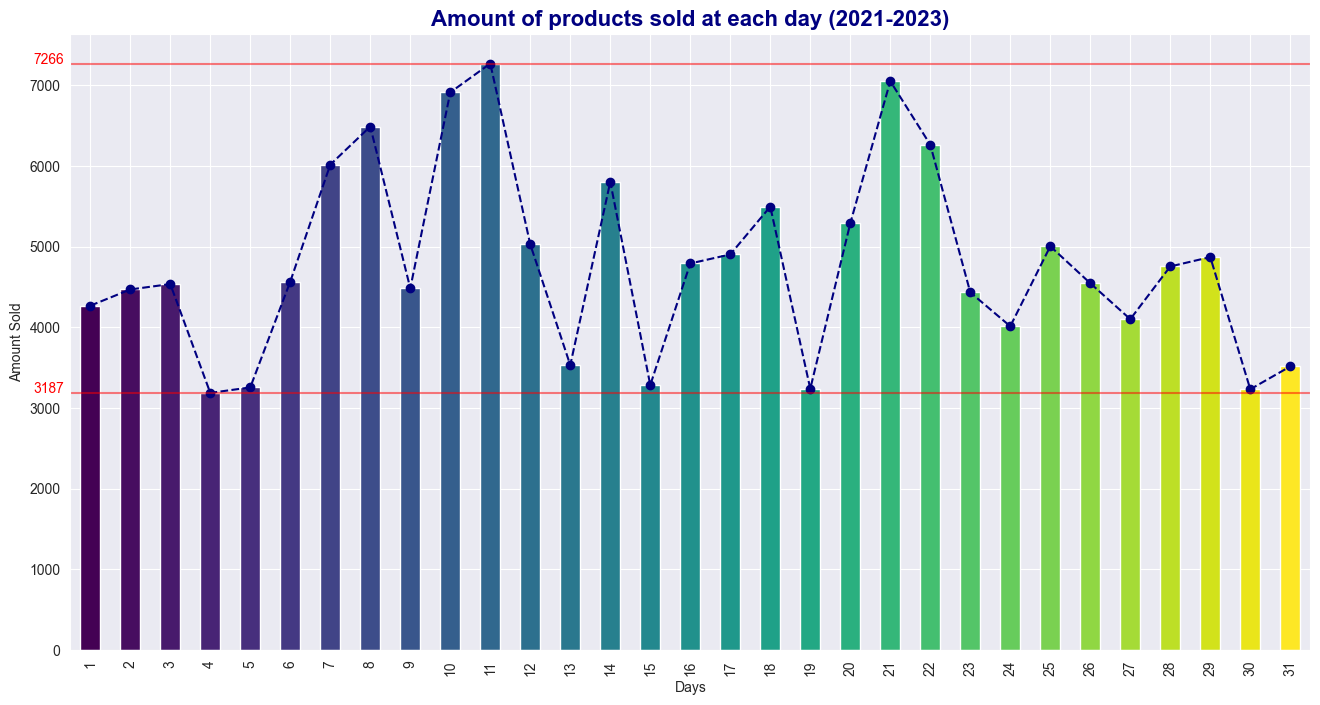

In [45]:
# Creating onesubplot only with size 16 to 8
fig, ax = plt.subplots(figsize=(16,8))

# Drawing a bar plot setting purchase days on x-axis, and sold amount on y-axis
amount_by_day_df.plot.bar(x='purchase_day', 
                               y='sold_amount', 
                               color=colormap(np.linspace(0,1,len(amount_by_day_df.purchase_day.unique()))),
                               legend=False,
                               ax=ax)

# Drawing the line plot that passes through the top of the bars
ax.plot(amount_by_day_df.index,
         amount_by_day_df.sold_amount, 
         marker='o', 
         color='navy', 
         linestyle='--')

# Drawing horizontal lines with corresponding maximum and minimum sold_amount values
ax.axhline(amount_by_day_df.sold_amount.min(),
            color='red',
            alpha=0.5)
ax.axhline(amount_by_day_df.sold_amount.max(),
            color='red',
            alpha=0.5)

# Writing down the max and min values next to horizontal lines
ax.text(-0.03, 
         amount_by_day_df.sold_amount.min(), 
         '{}'.format(amount_by_day_df.sold_amount.min()),
         transform = ax.get_yaxis_transform(),
         fontdict={'color':'red'}
         )
ax.text(-0.03, 
         amount_by_day_df.sold_amount.max(), 
         '{}'.format(amount_by_day_df.sold_amount.max()),
         transform = ax.get_yaxis_transform(),
         fontdict={'color':'red'}
         )

# Creating title and label names
ax.set_title('Amount of products sold at each day (2021-2023)', 
          fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
ax.set_ylabel('Amount Sold')
ax.set_xlabel('Days');


Based on our analysis, we can observe interesting insights:
* The highest number of products have been selling in Day 11 since 2021 January till 2023 of March, reaching the record number of 7266 products.
* The next highest number of products were sold in Day 21 with slightly over than 7000 prodcts.
* Since 2021, the lowest number of products been selling didn't go below 3187 products. In Day 4, 5, 15, 19, and 30, all sales came near to this threshold, but everytime went upward. So with high probability we can say that if products will be sold as before, then the minimum number of products this company can sell might never go below 3187.
* The interesting pattern can be observed, namely before and after each highest points, there are huge drops in sale.
* Based on above observations, we can predict that in 2023, the number of products will increase with periodic drops.  

# Lets identify top 10 the most popular products based on number of products sold clustered by months of each year?

In [46]:
amount = sales_df[['purchase_year','purchase_month','purchase_day','product_id','sold_amount']]

Creating DataFrame named amount by taking only 5 columns: purchase_year, purchase_month, purchase_day, product_id, sold_amount

In [47]:
amount = amount.sort_values(by=['purchase_year','purchase_month','purchase_day'])

Sorting values by 3 columns: purchase_year, purchase_month, purchase_day in ascending order

In [48]:
amount_by_product = amount.groupby(['purchase_year','purchase_month','product_id'], as_index=False)['sold_amount'].sum()

Grouping dataset by 3 columns: purchase_year, purchase_month, product_id, not converting them into indices; summing the values, corresponding to grouped column values, in column sold_amount. 

In [49]:
amount_by_product

purchase_year  purchase_month  product_id  sold_amount
0              2021               1          50            7
1              2021               1          51            3
2              2021               1          53           18
3              2021               1          54            3
4              2021               1          56            6
...             ...             ...         ...          ...
2422           2023               3         236            4
2423           2023               3         238           36
2424           2023               3         240            3
2425           2023               3         243            6
2426           2023               3         244            6

[2427 rows x 4 columns]

The final dataset will look like this

In [50]:
amount_by_product.purchase_month = pd.to_datetime(amount_by_product.purchase_month, format='%m').dt.month_name()
amount_by_product.purchase_month = pd.Categorical(amount_by_product.purchase_month, categories=Months, ordered=True)
amount_by_product 

purchase_year purchase_month  product_id  sold_amount
0              2021        January          50            7
1              2021        January          51            3
2              2021        January          53           18
3              2021        January          54            3
4              2021        January          56            6
...             ...            ...         ...          ...
2422           2023          March         236            4
2423           2023          March         238           36
2424           2023          March         240            3
2425           2023          March         243            6
2426           2023          March         244            6

[2427 rows x 4 columns]

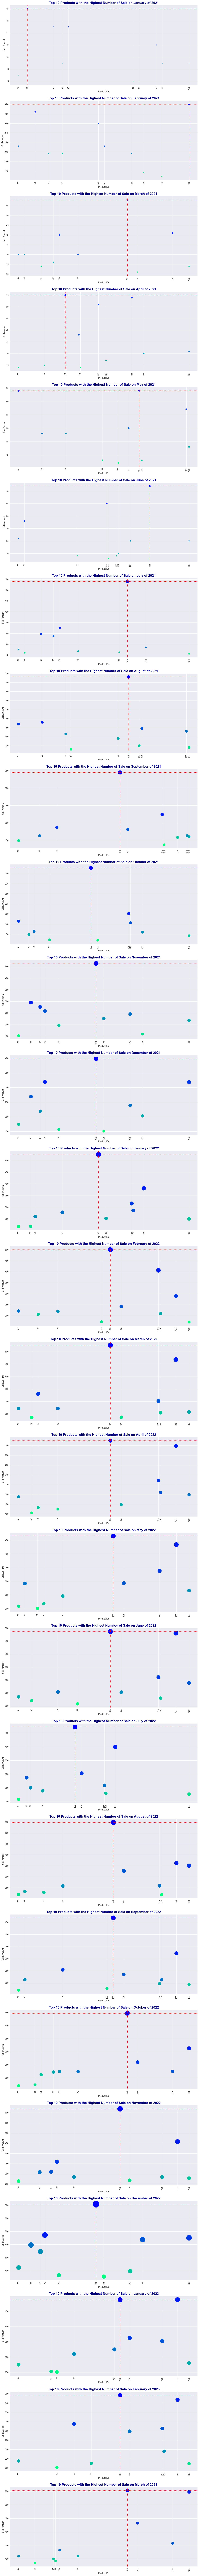

In [51]:
# Creating the list of (year, month) list of tuples taken from the above dataset
year_month_list = [(year,month) for year in amount_by_product.purchase_year.unique() for month in amount_by_product.loc[amount_by_product.purchase_year==year,'purchase_month'].unique()]

# Creating subplots with rows equal to the number of elements in the year_month_list, and columns equal to 1 with
# figure size 16 x 220
fig, axs = plt.subplots(nrows=len(year_month_list), ncols=1, figsize=(16,220))

# Converting the 'product_id' column values' type to category
amount_by_product.product_id = pd.Categorical(amount_by_product.product_id)

# Getting the colormap named 'winter'
color = plt.get_cmap('winter')

# Creating a new empty DataFrame
top_products = pd.DataFrame()

# Creating a 'for loop' that iterates a number of times equal to the number of elements in the list
# Using enumerate() to separate values in the list that are stored as pairs in tuple assigning each of them indices
for i, (year,month) in enumerate(year_month_list):
    
    # Getting a DataFrame with particular year and month values
    df = amount_by_product[(amount_by_product.purchase_year==year)&(amount_by_product.purchase_month==month)]

    # Sorting the DataFrame by the column 'sold_amount' in descending order
    df = df.sort_values(by=['sold_amount'], ascending=False)

    # Taking only top 10 data in the DataFrame
    df = df.head(10)
    
    # Creating a new DataFrame each time adding into it the top 10 rows in the DataFrame df using pd.concat() function 
    top_products = pd.concat([top_products,df])

    # Preparing a scatter plot setting 'product_id' values in x-axis and 'sold_amount' values in y-axis;
    # Each dot in graph will have the size corresponding to their values, colored differently by colormap 'winter'
    # the plot will be drawn at corresponding plot
    ax =df.plot.scatter(x='product_id', 
                    y='sold_amount',
                    s=df['sold_amount'],
                    c=color(np.linspace(0,1,len(df.product_id.unique()))),
                    ax=axs[i])
    
    # Setting the title of graph and its font design
    ax.set_title('Top 10 Products with the Highest Number of Sale on {} of {}'.format(month, year),
                 fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    
    # Setting the names of x and y-axes
    ax.set_xlabel('Product IDs')
    ax.set_ylabel('Sold Amount')

    # Drawing the vertical and horizontal lines corresponding to max value in DataFrame
    ax.axhline(df.sold_amount.max(), linestyle=':', color='red')
    ax.axvline(df.loc[df.sold_amount.idxmax(),'product_id'], linestyle=':', color='red')

    # Setting x-axis labels by taking the x values present in DataFrame as ticks rotating by 90 degree 
    ax.set_xticks(df['product_id'])
    ax.set_xticklabels(df['product_id'], rotation=90);

Well, based on the graphs followings insights are definitely interesting enough to make some notes:
* In 2021, the product 103 (ID) has been the number one product with the highest number of sales 7 months with 6 months in streak.
* In 2022, there was no competition at all, since product 103 (ID) was the most popular product at each month with 12 months streak.
* The beginning of 2023, again was associated with the triumph of this product, however there was indeed a high competition with product 133 (ID) every time getting close to be named the product of the month.

Based on the last remark, we can predict the surge in demand for the product 133 (ID) in the near future. It might even surpass the record established by 103 (ID).

# Now, lets check what are the top 10 products of each year?

In [52]:
top_products = top_products.reset_index(drop=True)

Resetting the index values of DataFrame 'top_products' without converting the previous indices to a new column (that's why drop=True)

In [53]:
top_products_by_year = top_products.groupby(['purchase_year','product_id'], as_index=False)['sold_amount'].sum()

Creating new DataFrame by grouping the 'top_products' by columns 'purchase_year' and 'product_id', summing over 'sold_amount' values

In [54]:
top_products_by_year.loc[top_products_by_year.sold_amount==top_products_by_year.sold_amount.min(),'sold_amount']

1      0
2      0
4      0
5      0
6      0
      ..
466    0
467    0
468    0
469    0
470    0
Name: sold_amount, Length: 407, dtype: int64

While creating top_products_by_year DataFrame there were created some rows with 'sold_amount' values equal to 0. Better to eliminate them from the DataFrame.

In [55]:
top_products_by_year = top_products_by_year.drop(index=top_products_by_year[top_products_by_year.sold_amount==top_products_by_year.sold_amount.min()].index)

Dropping the rows that correspond to zeros in 'sold_amount' using .drop(index)

In [56]:
top_products_by_year

purchase_year product_id  sold_amount
0             2021         50          284
3             2021         53          418
8             2021         58           26
11            2021         61         1296
12            2021         62           15
..             ...        ...          ...
366           2023        108          815
378           2023        125          780
379           2023        126          236
385           2023        133         1054
387           2023        139          489

[64 rows x 3 columns]

Now we have top 10 products of each month clustered by each year

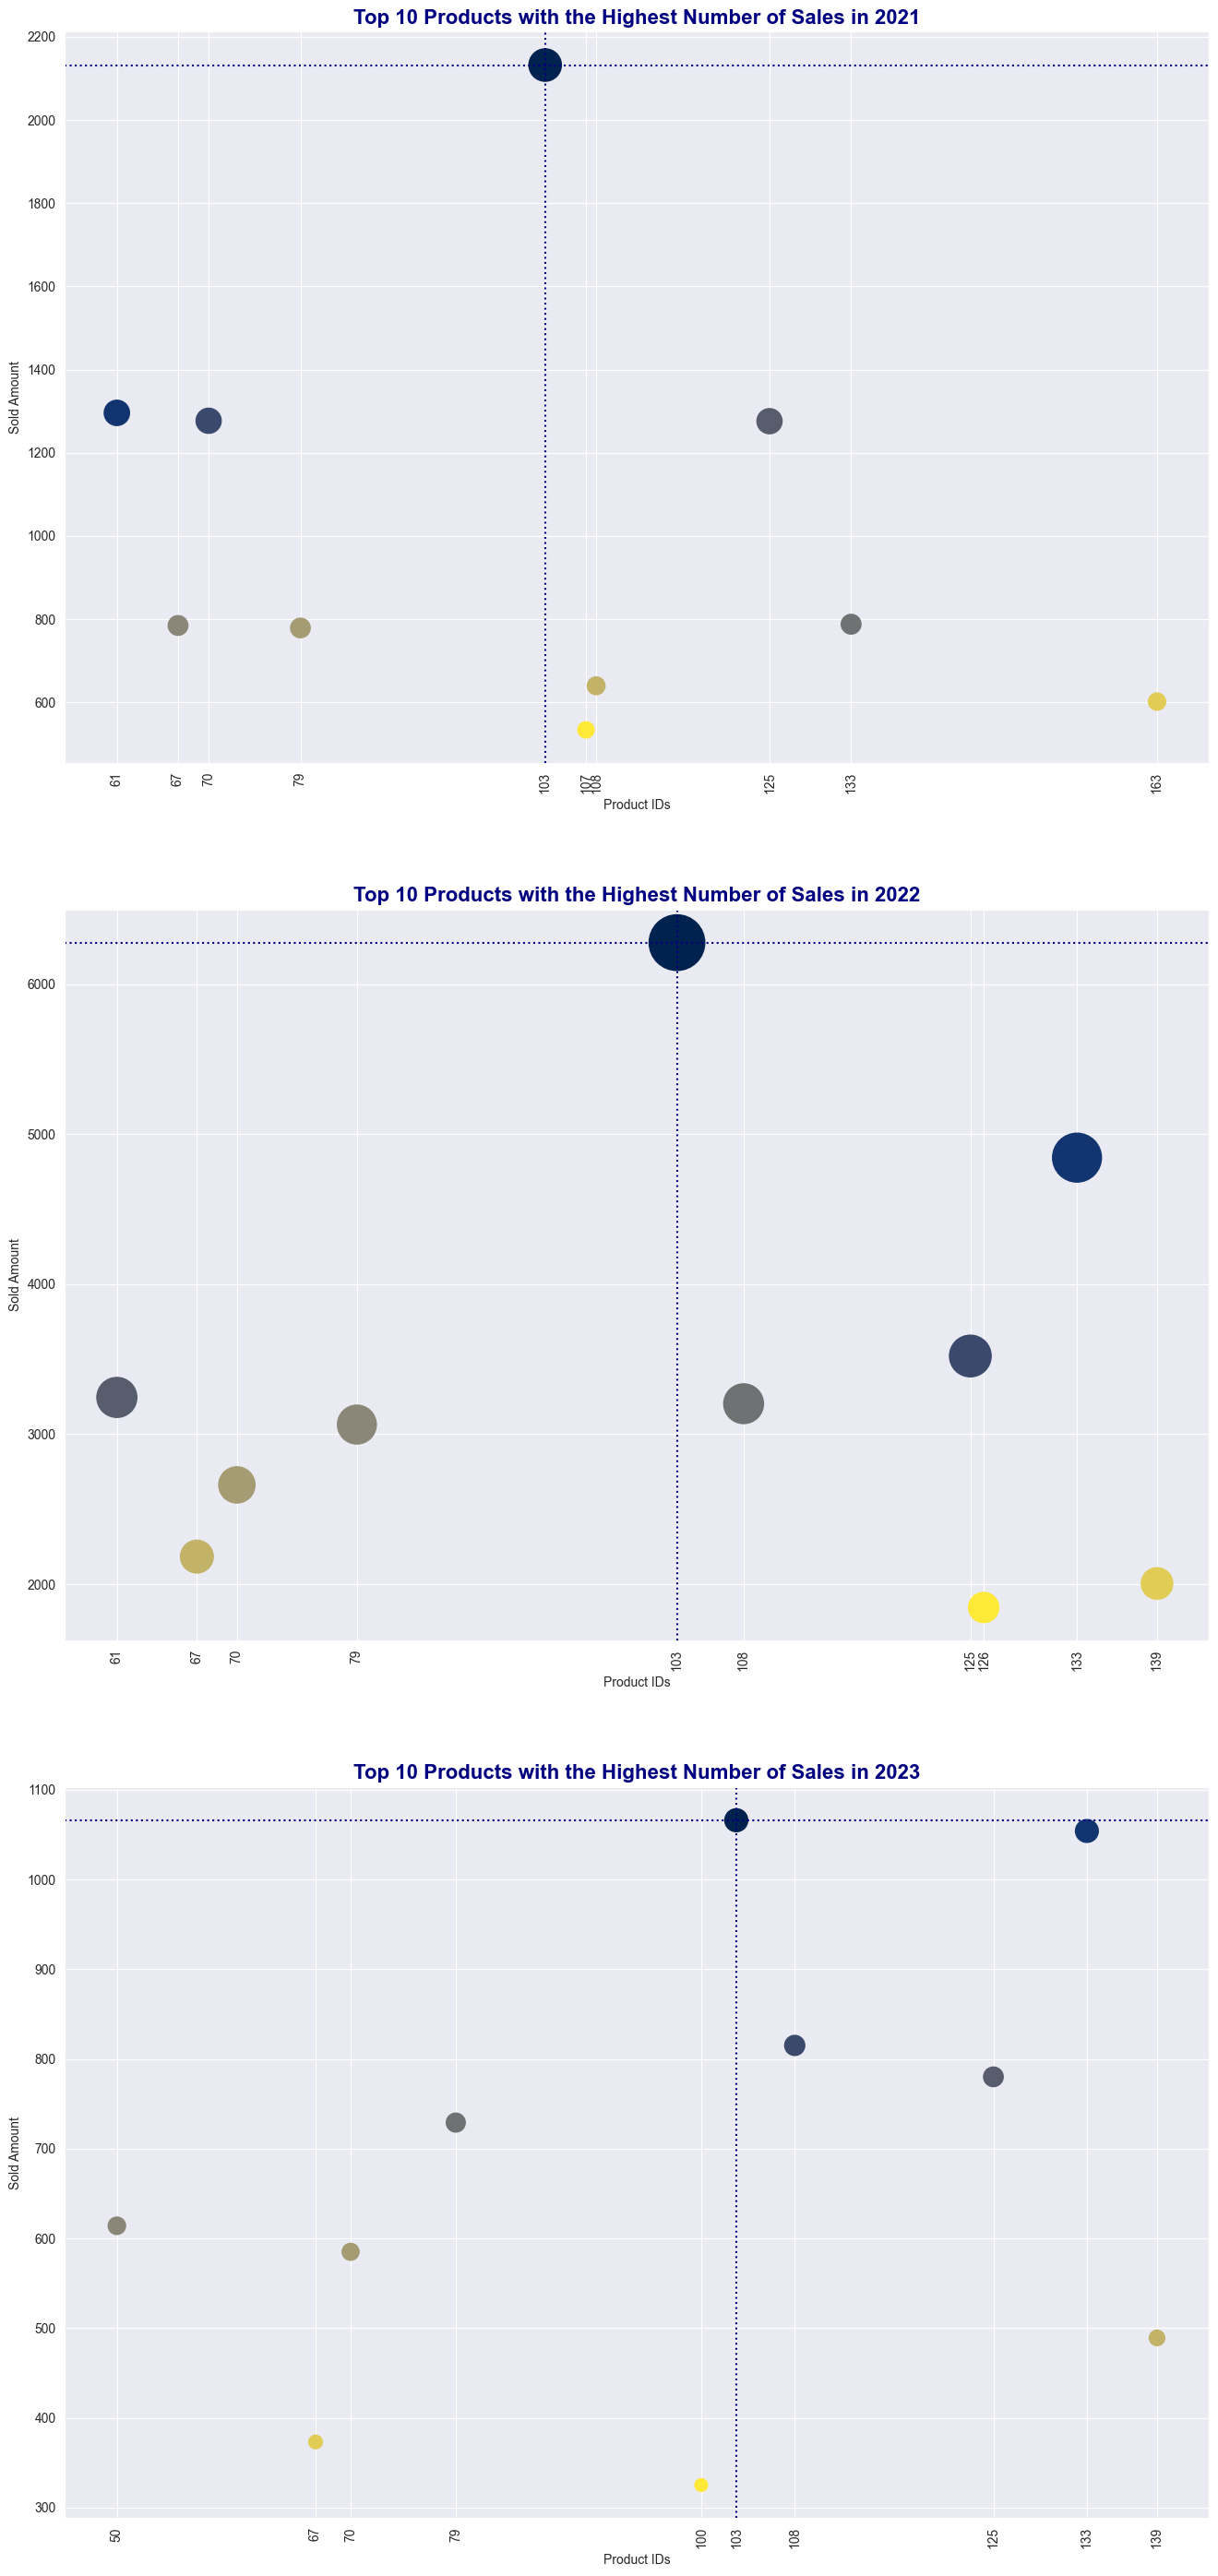

In [57]:
# Creating subplots with rows equal to the number of unique years, and columns equal to 1 with figure size 16 x 35
fig, axs = plt.subplots(nrows=len(top_products_by_year.purchase_year.unique()), ncols=1, figsize=(16,35))

# Getting the colormap named 'viridis'
cmp = plt.get_cmap('cividis')

# Creating an empty set
top_product_ids = set()

# Creating for loop going a number of times equal to unique year numbers in DataFrame
for i,year in enumerate(top_products_by_year.purchase_year.unique()):

    # Taking the dataset with particular year values
    df = top_products_by_year[top_products_by_year.purchase_year==year]

    # Sorting values by 'sold_amount' in descending order
    df = df.sort_values(by=['sold_amount'], ascending=False)

    # Taking 10 rows on top of the dataset 
    df = df.head(10)
    
    # Adding those product IDs that corresponds to 10 top rows, converting them to tuple 
    # (we convert to tuples since it is immutable)
    top_product_ids.add(tuple(df.product_id.values))

    # Creating a scatter plot with reduced size of dots, 'product_id' in x-axis and 'sold_amount' in y-axis
    df.plot.scatter(x='product_id',
                    y='sold_amount',
                    s=df['sold_amount']-df['sold_amount']*0.7,
                    c=cmp(np.linspace(0,1,len(df.product_id.unique()))),
                    ax=axs[i])
    
    # Setting title, x and y labels
    axs[i].set_title(f'Top 10 Products with the Highest Number of Sales in {year}',
                     fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    axs[i].set_ylabel('Sold Amount')
    axs[i].set_xlabel('Product IDs')

    # Drawing horizontal and vertical lines passing through max value
    axs[i].axhline(df.sold_amount.max(), linestyle=':', color='navy')
    axs[i].axvline(df.loc[df.sold_amount.idxmax(),'product_id'], linestyle=':', color='navy')
    
    # Setting x-axis parameters, taking not the equal spaced range of values but those values that are in dataset
    axs[i].set_xticks(df['product_id'])
    axs[i].set_xticklabels(df['product_id'], rotation=90);


The interesting result was observed analyzing the following graph. 
* The product with 103 ID was the only product that was leading the race with the highest number of sales at each year. Good to know since improving this product any further can get more dividends in the future. 
* Also producs with 125 and 133 IDs appeared at each year with comparatively high results, which might be a sign to give some attention to these products too, creating some marketing strategies to let to know more and more customers about these products.  

# Lets check what are top products showed up among top so far

In [58]:
top_product_ids = set.intersection(*(set(s) for s in top_product_ids))

Getting each element in the set, that are stored as tuples, converting it to the set, and finding the common values among these sets using .intersection() function

In [59]:
top_product_ids

{67, 70, 79, 103, 108, 125, 133}

We get product IDs that appeared at each year

In [60]:
top_7 = sales_df.loc[sales_df.product_id.apply(lambda x: True if x in top_product_ids else False),['product_id','sold_amount']]

Creating a new DataFrame with 'product_id' values coinciding with values in top_product_ids

In [61]:
top_7 = top_7.groupby(['product_id'], as_index = False)['sold_amount'].sum()

Grouping the DataFrame by 'product_id', summing over 'sold_amount'

In [62]:
top_7 = top_7.sort_values(by=['sold_amount'], ascending=False)

Sorting values by 'sold_amount' in descending order

In [63]:
top_7

product_id  sold_amount
3         103         9480
6         133         6738
5         125         5619
1          70         5094
4         108         4921
2          79         4697
0          67         4441

The final result will look like this with the highest sold_amount at the top

In [64]:
top_names = sales_df.loc[sales_df.product_id.apply(lambda x: True if x in top_product_ids else False), ['product_id','product_name']]

Creating a DataFrame with 'product_id' values found in 'top_7' ids, taking 'product_id' and 'product_name' columns only 

In [65]:
top_names = top_names.drop_duplicates()

Dropping duplicates in DataFrame using .drop_duplicates() function

In [66]:
top_names

product_id          product_name
id                                        
27f27e5c          67   CANELA ASTILLA X10G
b5fb7da5          70      CLAVO ENTERO X5G
107d09a5         103    CANELA ASTILLA X5G
3efdd888         108          CURCUMA X20G
4825e92b         125  ADOBO 7 HIERBAS X60G
71e865b8          79      BICARBONATO X50G
c42de460         125  ADOBO 7 HIERBAS X90G
984bbe0c         133     AJO MOLIDO X 40 G
340fb4b6         133     AJO MOLIDO X 20 G
7dd77225         125      SUPER ADOBO X90G
6436ee66          67  CANELAS ASTILLA X10G
a059ad9e         103   CANELAS ASTILLA X5G

The final DataFrame will look like this

In [67]:
top_7 = pd.merge(left=top_7, right=top_names,how='inner',on=['product_id'])

Merging top_7 and top_names DataFrames by 'inner' method combining on 'product_id', using .merge() function

In [68]:
top_7

product_id  sold_amount          product_name
0          103         9480    CANELA ASTILLA X5G
1          103         9480   CANELAS ASTILLA X5G
2          133         6738     AJO MOLIDO X 40 G
3          133         6738     AJO MOLIDO X 20 G
4          125         5619  ADOBO 7 HIERBAS X60G
5          125         5619  ADOBO 7 HIERBAS X90G
6          125         5619      SUPER ADOBO X90G
7           70         5094      CLAVO ENTERO X5G
8          108         4921          CURCUMA X20G
9           79         4697      BICARBONATO X50G
10          67         4441   CANELA ASTILLA X10G
11          67         4441  CANELAS ASTILLA X10G

Above is the final DataFrame we took from merging

Based on the results drawn from the graph 'Top 10 Products with the Highest Sale', it's been identified that there are exactly 7 products that are truly popular among customers based on yearly sale analysis i.e. these products are in demand among customers in comparison with other products. Here is the list of products starting with number 1, meaning the most popular:

1. <span style="color:red"> Canela Astilla x5G </span> - the number one product with the highest number of sales thoughout the years, numerically 9480 sales since 2021 January.
2. <span style="color:red"> Ajo Molido x20G and x40G </span> - the second the most popular products in the arsenal of this company, with 6378 sales since the beginning.
3. <span style="color:red"> Adobo 7 Hierbas x60G, X90G and Super Adobo x90G </span> - the third most popular products in the shell. They made up 5619 sales since 2021 of January.
4. <span style="color:red"> Clavo Entero X5G </span> - the product that made the day of many customers as this product is in high demand, so may be this is the reason why this product is the 4th product with 5094 number of sales.
5. <span style="color:red"> Curcuma X20G </span> - following the lead of Clavo Entero X5G, taking the 5th place in number of sales, that is 4921.
6. <span style="color:red"> Bicarbonato X50G </span> - also wasn't left without attention by suctomers as this product among top 7 products with one of the highest number of sales, namely 4697.
7. <span style="color:red"> Canela Astilla X10G </span> - sibling of Canela Astilla x5G but unlike the last product it didn't get the 1st place, but hey 7th place with 4441 sales makes Canela Astilla X10G a hot product ready to be taken away by buyers in any seconds.  

# Which product is the most expensive one and which is the cheapest?

In [69]:
ex_cheap_df = sales_df[['purchase_year','purchase_month','purchase_day','product_id','product_name','unit_price','sold_amount','total_price']]

Creating new DataFrame with purchase_year, purchase_month, purchase_day, product_id, product_name, unit_price, sold_amount, total_price columns

In [70]:
ex_cheap_df.loc[ex_cheap_df.unit_price.apply(lambda x: True if x == sales_df.unit_price.max() else False),
                ['purchase_year','purchase_month','product_id','product_name','unit_price','total_price']]

purchase_year  purchase_month  product_id           product_name  \
id                                                                           
bbfeec68           2021               7         180  PIMIENTA MOLIDA X500g   
2496b8fa           2021               9         180  PIMIENTA MOLIDA X500g   
3f45ebb1           2021              10         180  PIMIENTA MOLIDA X500g   
8d169db8           2021              11         180  PIMIENTA MOLIDA X500g   
bf501732           2022               6         180  PIMIENTA MOLIDA X500g   

          unit_price  total_price  
id                                 
bbfeec68       14000        28000  
2496b8fa       14000        42000  
3f45ebb1       14000        28000  
8d169db8       14000        14000  
bf501732       14000        42000

#### <span style="color:red"> NOTE: </span> the most expensive product in the list is Pimienta Molida X500G. This product costs 14000 per unit. Pretty expensive. Well, obiously not the first-buy prouct due its price probably. This product has been bought only few times, mostly in 2021 with at most 4 units per one purchase, making up in total 42000 in price. In 2022, it was bought only once on July, and no sign in 2023.

In [71]:
ex_cheap_df.loc[ex_cheap_df.unit_price.apply(lambda x: True if x == sales_df.unit_price.min() else False),
                ['purchase_year','purchase_month','product_id','product_name','unit_price','total_price']]

purchase_year  purchase_month  product_id             product_name  \
id                                                                             
0ac917a4           2021              11         193  CAJITA BICARBONATO X10G   
192bba01           2022               1         193  CAJITA BICARBONATO X10G   
927c7382           2022               2         193  CAJITA BICARBONATO X10G   
e107ccb4           2022               2         193  CAJITA BICARBONATO X10G   
cf28fc05           2022               2         193  CAJITA BICARBONATO X10G   
c13093db           2022               2         193  CAJITA BICARBONATO X10G   
e738b00a           2022               3         193  CAJITA BICARBONATO X10G   
8a55398d           2022               3         193  CAJITA BICARBONATO X10G   

          unit_price  total_price  
id                                 
0ac917a4         300         3600  
192bba01         300         1800  
927c7382         300         3600  
e107ccb4         300         3600  
cf28fc05         300         3600  
c13093db         300         3600  
e738b00a         300          900  
8a55398d         300         1800

#### <span style="color:red"> NOTE: </span> the cheapest product in the list is Cajita Bicarbonato X10G, which costs only 300. It's been highly popular only in the beginning of 2022 between january and March. No unit been sold in 2023. So, cheap doesn't always guarantee high sales, which means customers prefer quality to price (at reasonable price of course). The maximum number of units been sold at once was 12 at most. Product seems not very popular since it's been purchasing only at some times.

# Which product has made the highest profit so far?

In [72]:
ex_cheap_df.loc[ex_cheap_df.total_price.apply(lambda x: True if x == sales_df.total_price.max() else False),
                ['purchase_year','purchase_month','product_id','product_name','unit_price','total_price']]

purchase_year  purchase_month  product_id            product_name  \
id                                                                            
9e7ad855           2022               7         188  EMPAQUE DE CHORIZO X4M   
eae6722d           2022               7         188  EMPAQUE DE CHORIZO X4M   

          unit_price  total_price  
id                                 
9e7ad855        4700       352500  
eae6722d        4700       352500

In [73]:
352500/4700

75.0

#### <span style="color:red"> NOTE: </span> the highest profit so far was made in July 2022 where total price of the product made up 352500. And this was Empaque de chorizo X4M that made the day. During this purchase 75 units of this product were bought. By the way this is the highest number of units sold so far.

# Which product has made the least amount of profit so far?

In [74]:
ex_cheap_df.loc[ex_cheap_df.total_price.apply(lambda x: True if x == sales_df.total_price.min() else False),
                ['purchase_year','purchase_month','product_id','product_name','unit_price','total_price']]

purchase_year  purchase_month  product_id product_name  unit_price  \
id                                                                             
2823d313           2021               8          97  LINAZA X20G         340   

          total_price  
id                     
2823d313          340

#### <span style="color:red"> NOTE: </span> well, Linaza X20G is the most unpopular product with unit price 340 that was bought only once in August of 2021, making in total 340. I'd suggest to eliminate this product from the shelf.

# Lets check if there is any relationship between unit price and sale amount?

Text(0, 0.5, 'Amount Sold')

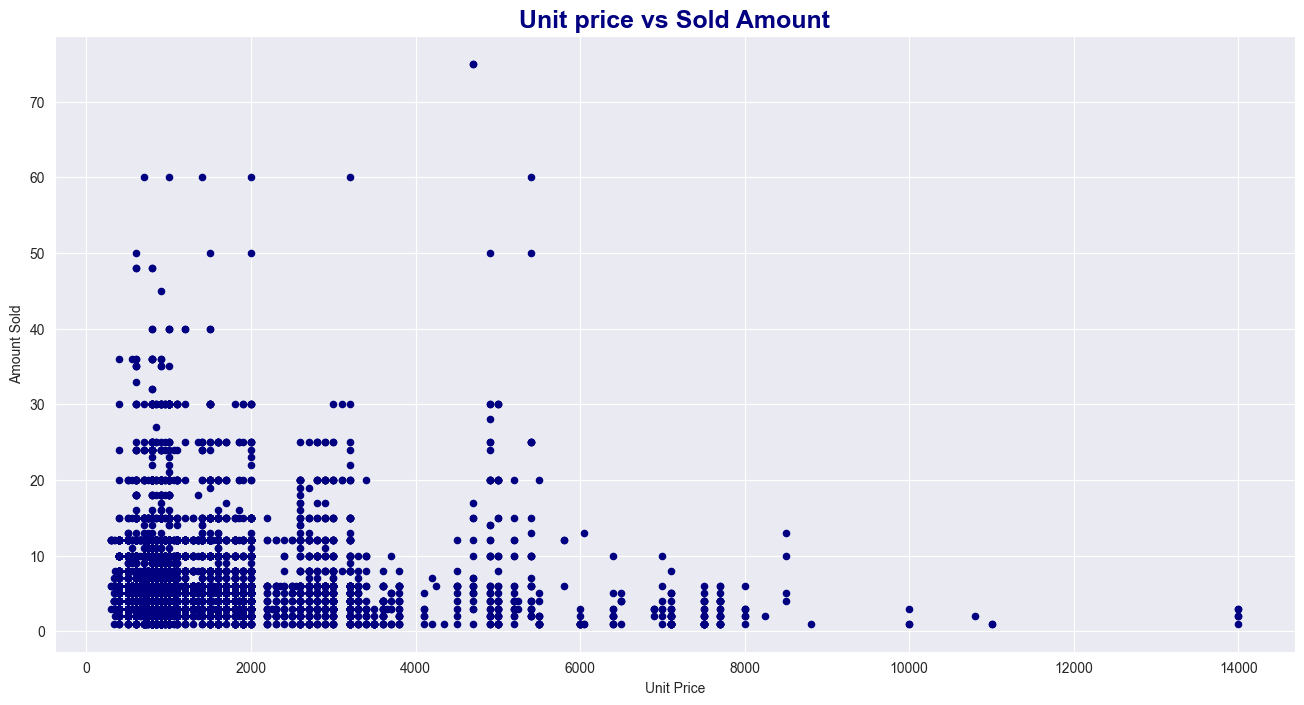

In [75]:
# Creating a scatter plot
ex_cheap_df.plot.scatter(x='unit_price', 
                         y='sold_amount', 
                         s=20,
                         c='navy',
                         figsize=(16,8))

# Setting title, x and y labels
plt.title('Unit price vs Sold Amount',
          fontdict={'fontname':'Arial','fontsize':18,'fontweight':'bold','color':'navy'})

plt.xlabel('Unit Price')
plt.ylabel('Amount Sold')

Based on scatter plot there is no a clear sign of relationship between sold_amount and unit_price i.e. we cannot say for sure either customers demand is increasing or decreasing as the unit price is increasing or decreasing.

# Lets identify at which days most purchases are made?

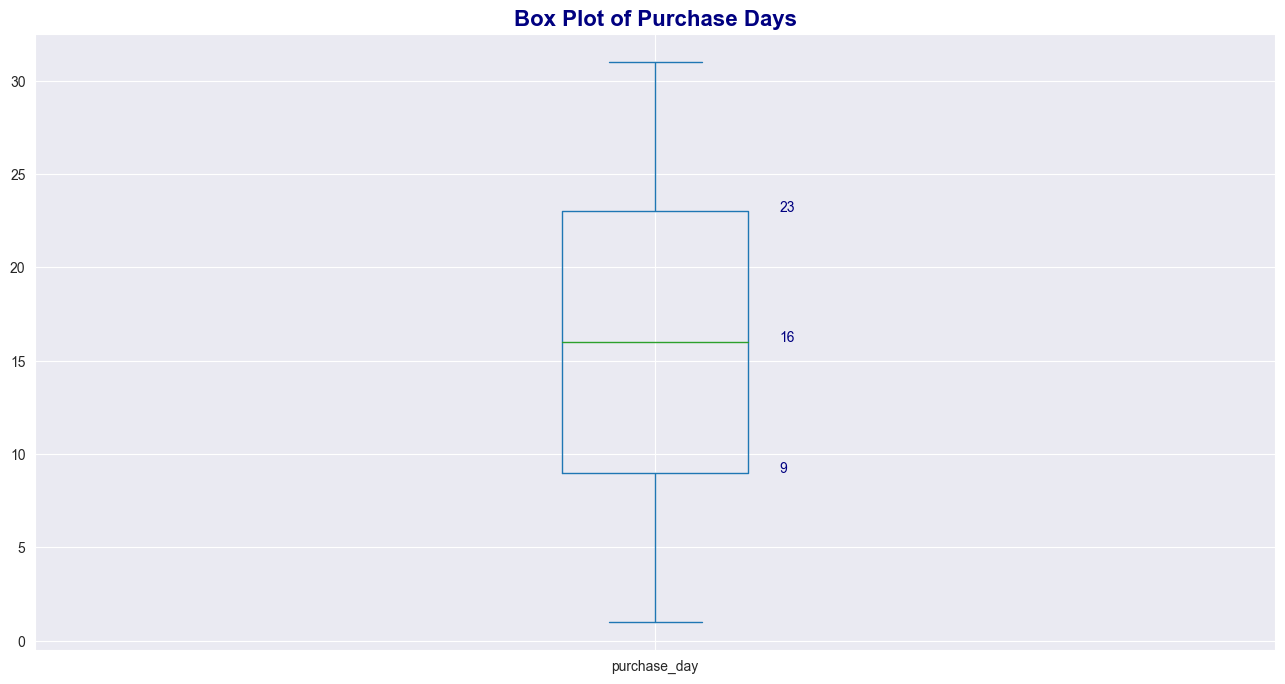

In [76]:
fig, ax = plt.subplots()
ex_cheap_df.purchase_day.plot.box(figsize=(16,8),ax=ax)
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.quantile(0.25),
        s='{}'.format(int(ex_cheap_df.purchase_day.quantile(0.25))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.quantile(0.75),
        s='{}'.format(int(ex_cheap_df.purchase_day.quantile(0.75))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.median(),
        s='{}'.format(int(ex_cheap_df.purchase_day.median())),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.set_title('Box Plot of Purchase Days',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});

#### Based on the box plot we see that majority of purchases were made between 9th and 23rd Days of the month since 2021 January. Since median value is exactly in the middle and not shifted to either sides, then we can say purchases were made equally as close to 9th and 23rd Days i.e. roughly speaking equal number of purchases were made between 9 and 23 Days at each day.

# Lets identify at which months most purchases are made?

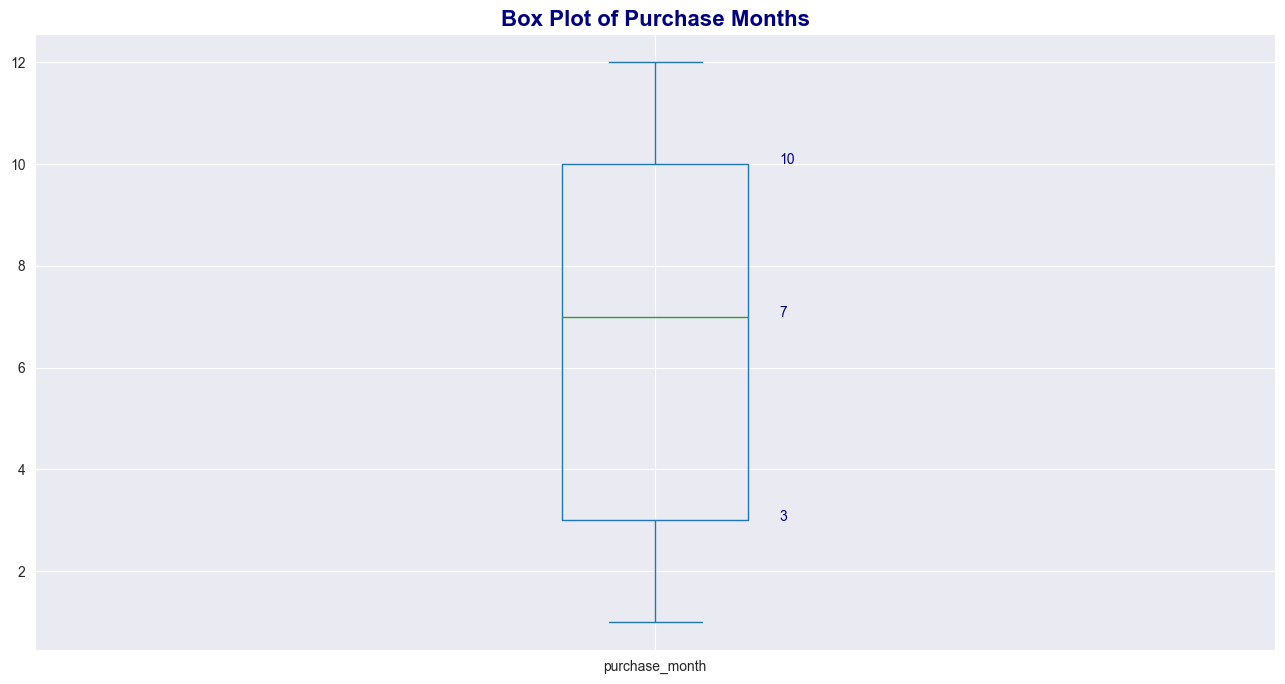

In [77]:
fig, ax = plt.subplots()
ex_cheap_df.purchase_month.plot.box(figsize=(16,8),ax=ax, )
ax.text(x=0.6,
        y=ex_cheap_df.purchase_month.quantile(0.25),
        s='{}'.format(int(ex_cheap_df.purchase_month.quantile(0.25))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_month.quantile(0.75),
        s='{}'.format(int(ex_cheap_df.purchase_month.quantile(0.75))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_month.median(),
        s='{}'.format(int(ex_cheap_df.purchase_month.median())),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.set_title('Box Plot of Purchase Months',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});

#### Based on the box plot we see that majority of purchases were made between 3rd and 10th Months of the of the year since 2021 January. Since median value is a little shifted upward, it means, comparatively, majority of purchases were made by between July and October rather than March and july. 

# Lets identify at what range, most of the time, products has been sold?

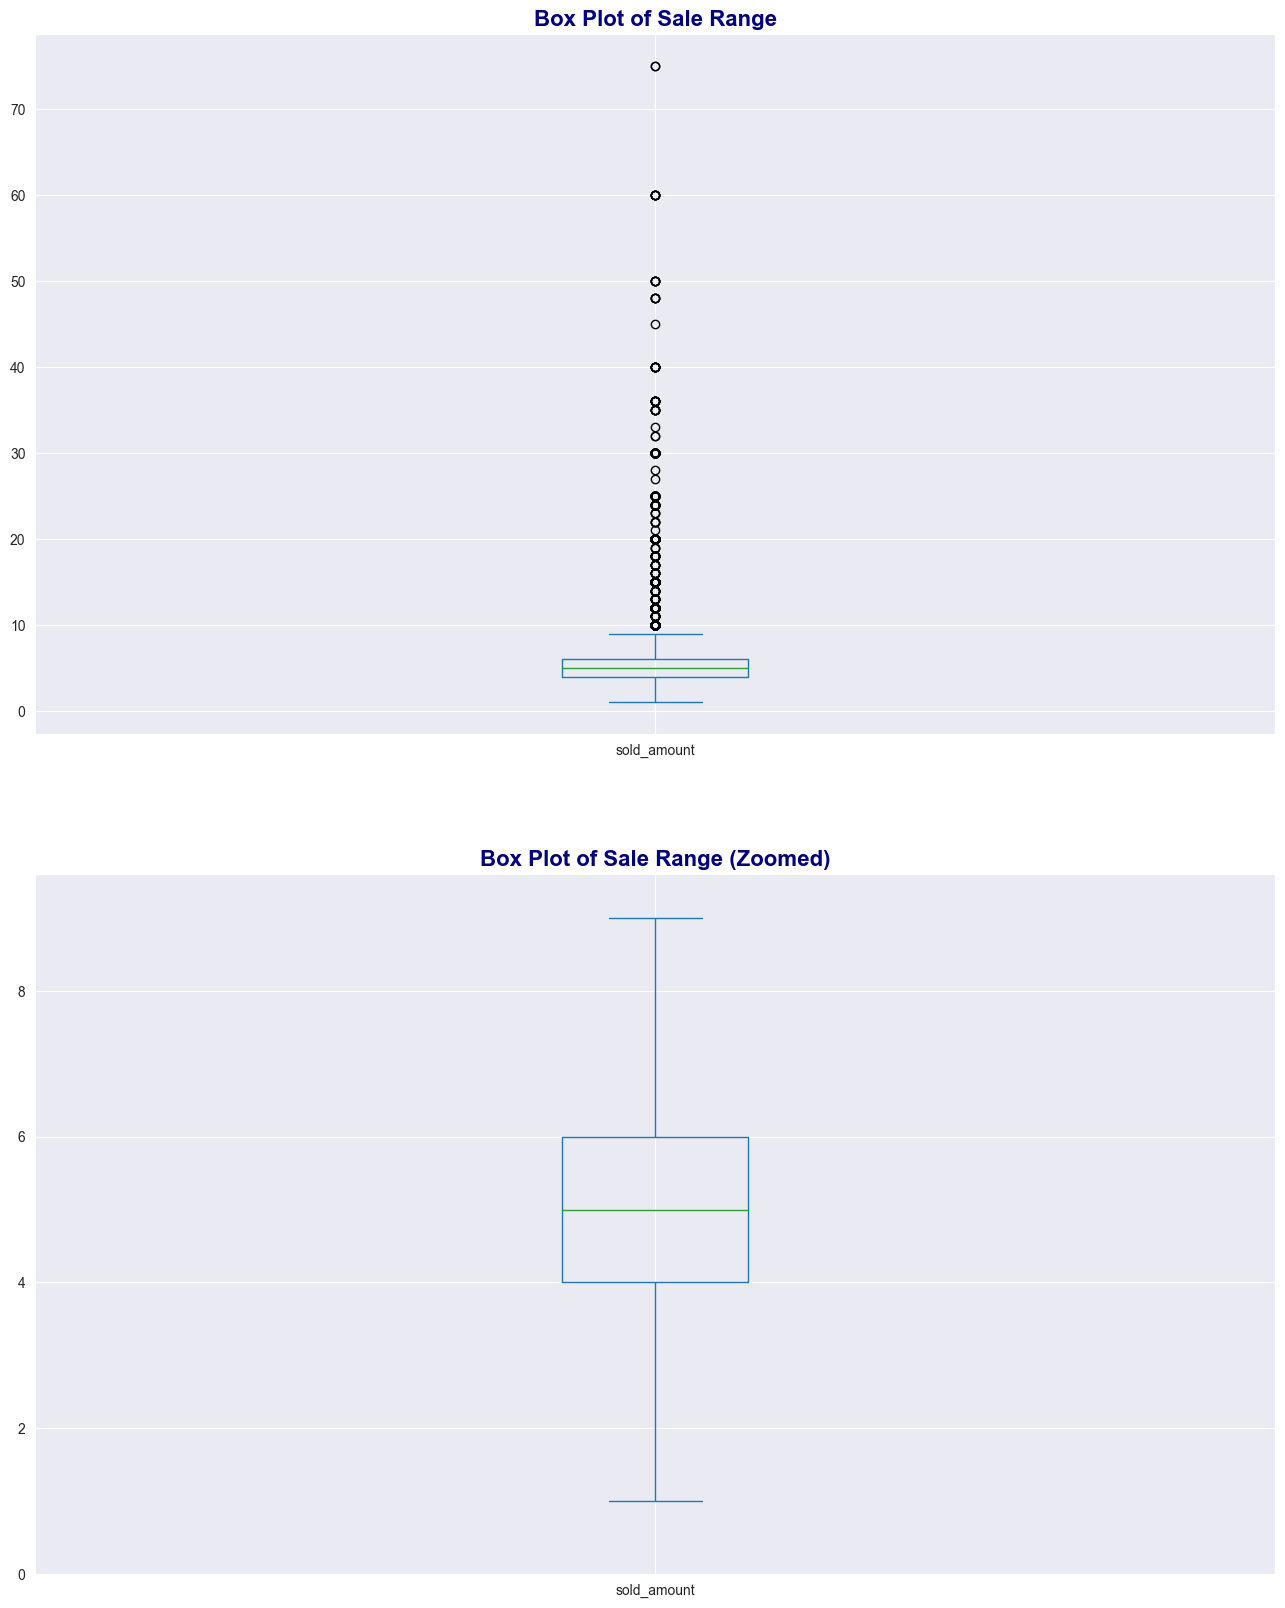

In [78]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,20))
ex_cheap_df.sold_amount.plot.box(ax=axs[0])
ex_cheap_df.sold_amount.plot.box(ax=axs[1])
axs[1].set_ylim(bottom = ex_cheap_df.sold_amount.min()-1, top = ex_cheap_df.sold_amount.quantile(0.75)*1.6)
axs[0].set_title('Box Plot of Sale Range',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
axs[1].set_title('Box Plot of Sale Range (Zoomed)',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});

#### Based on the box plot of sold_amount, following can be clarified.
* Majority of products are sold in the range between 4 and 6 i.e. this is the range customers usually buy most of the time. 
* In other cases, customers prefer to buy from 1 to 4 and 6 to 9 products. This is the second most copious range  of values in the dataset.
* In general, customers prefer to buy products in range of 1 and 9 products at once
* Since the range of values in box plot is much smaller than the range of outliers, it seems there are some products that are significantly more popular, with much higher sales numbers than those ranging between 1 and 9. 

# At what price range most of the products has been bought?

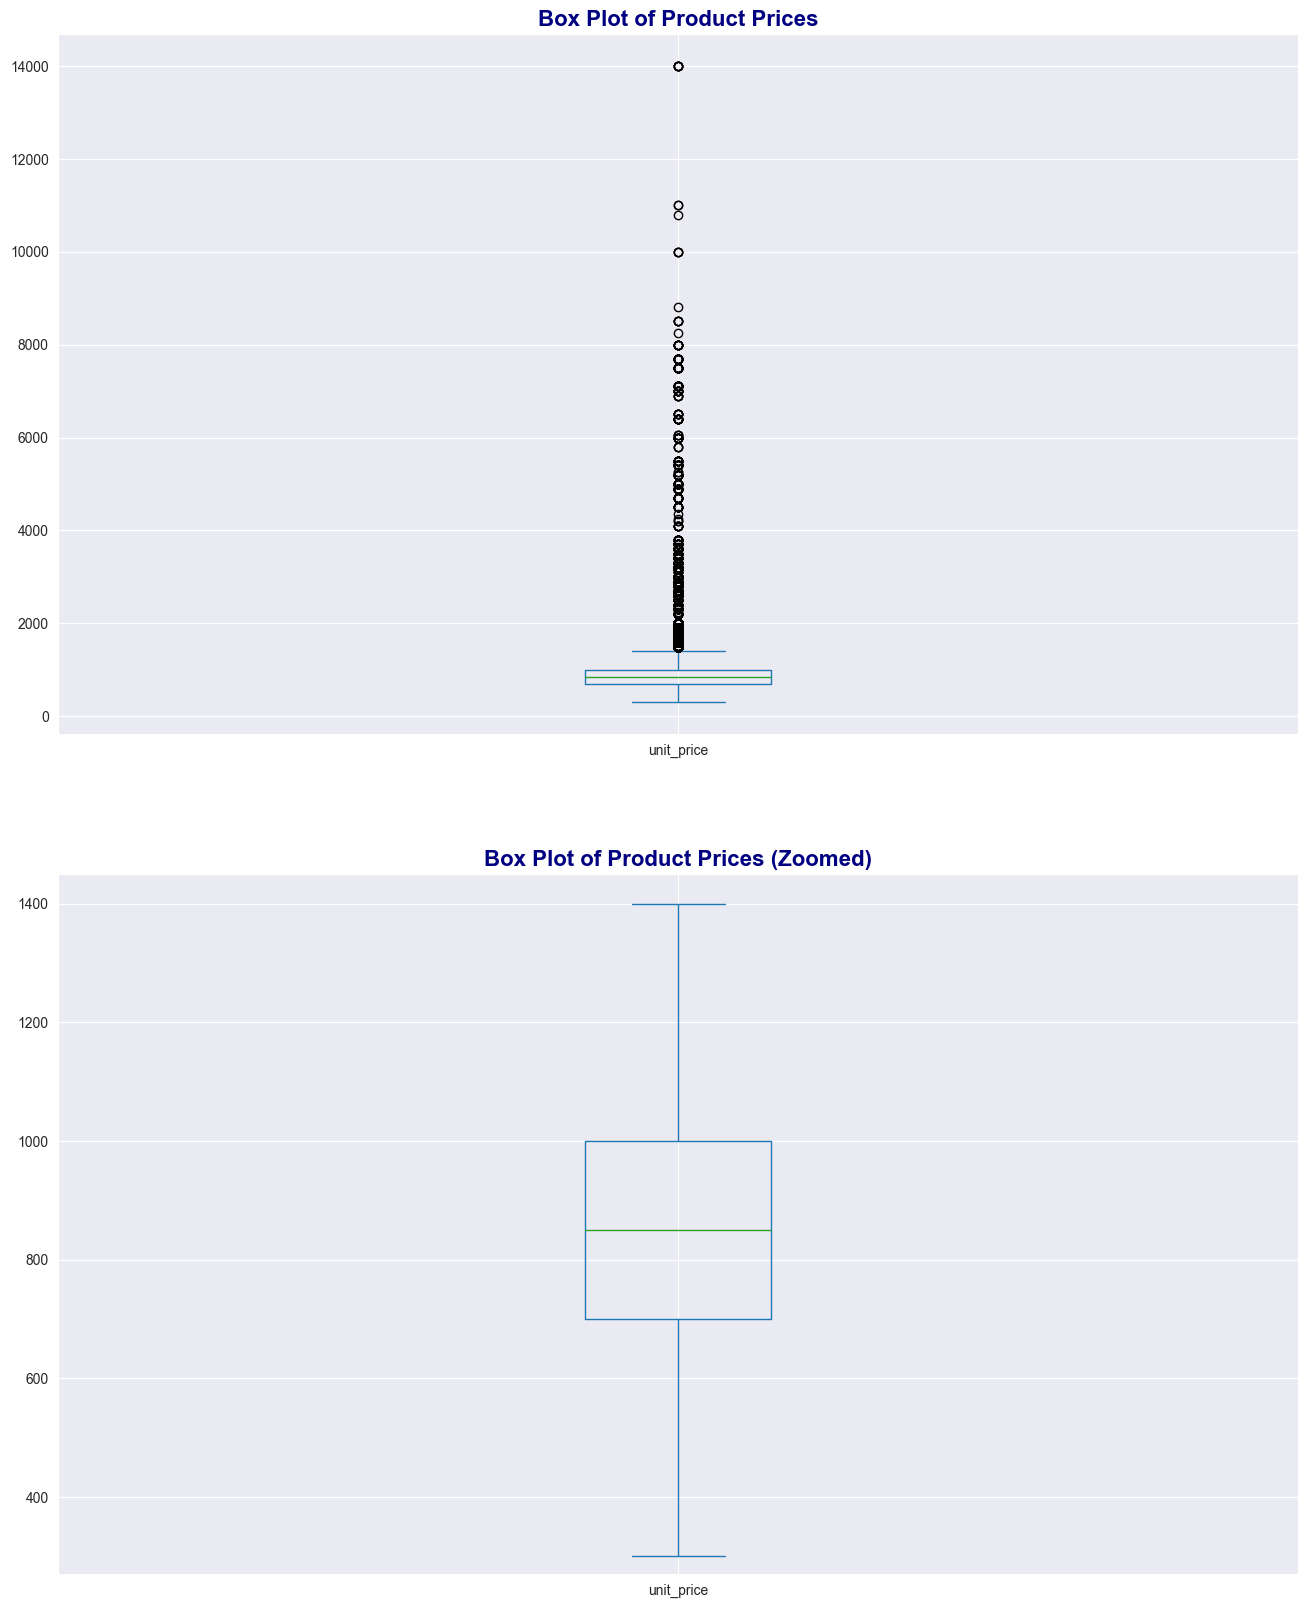

In [79]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,20))
ex_cheap_df.unit_price.plot.box(ax=axs[0])
ex_cheap_df.unit_price.plot.box(ax=axs[1])
axs[1].set_ylim(bottom = ex_cheap_df.unit_price.min()-30, top = ex_cheap_df.unit_price.quantile(0.75)+450)
axs[0].set_title('Box Plot of Product Prices',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
axs[1].set_title('Box Plot of Product Prices (Zoomed)',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});


In [80]:
ex_cheap_df.unit_price.min()

300

#### Based on the box plot of unit_price, following can be clarified.
* Majority of products has been sold in the range between 700 and 1000 i.e. this is the range of prices customers usually paid most of the time. 
* Since the range of values in box plot is much smaller than the range of outliers, it seems there are many high-end luxury products that range from 1000 to 14000. 

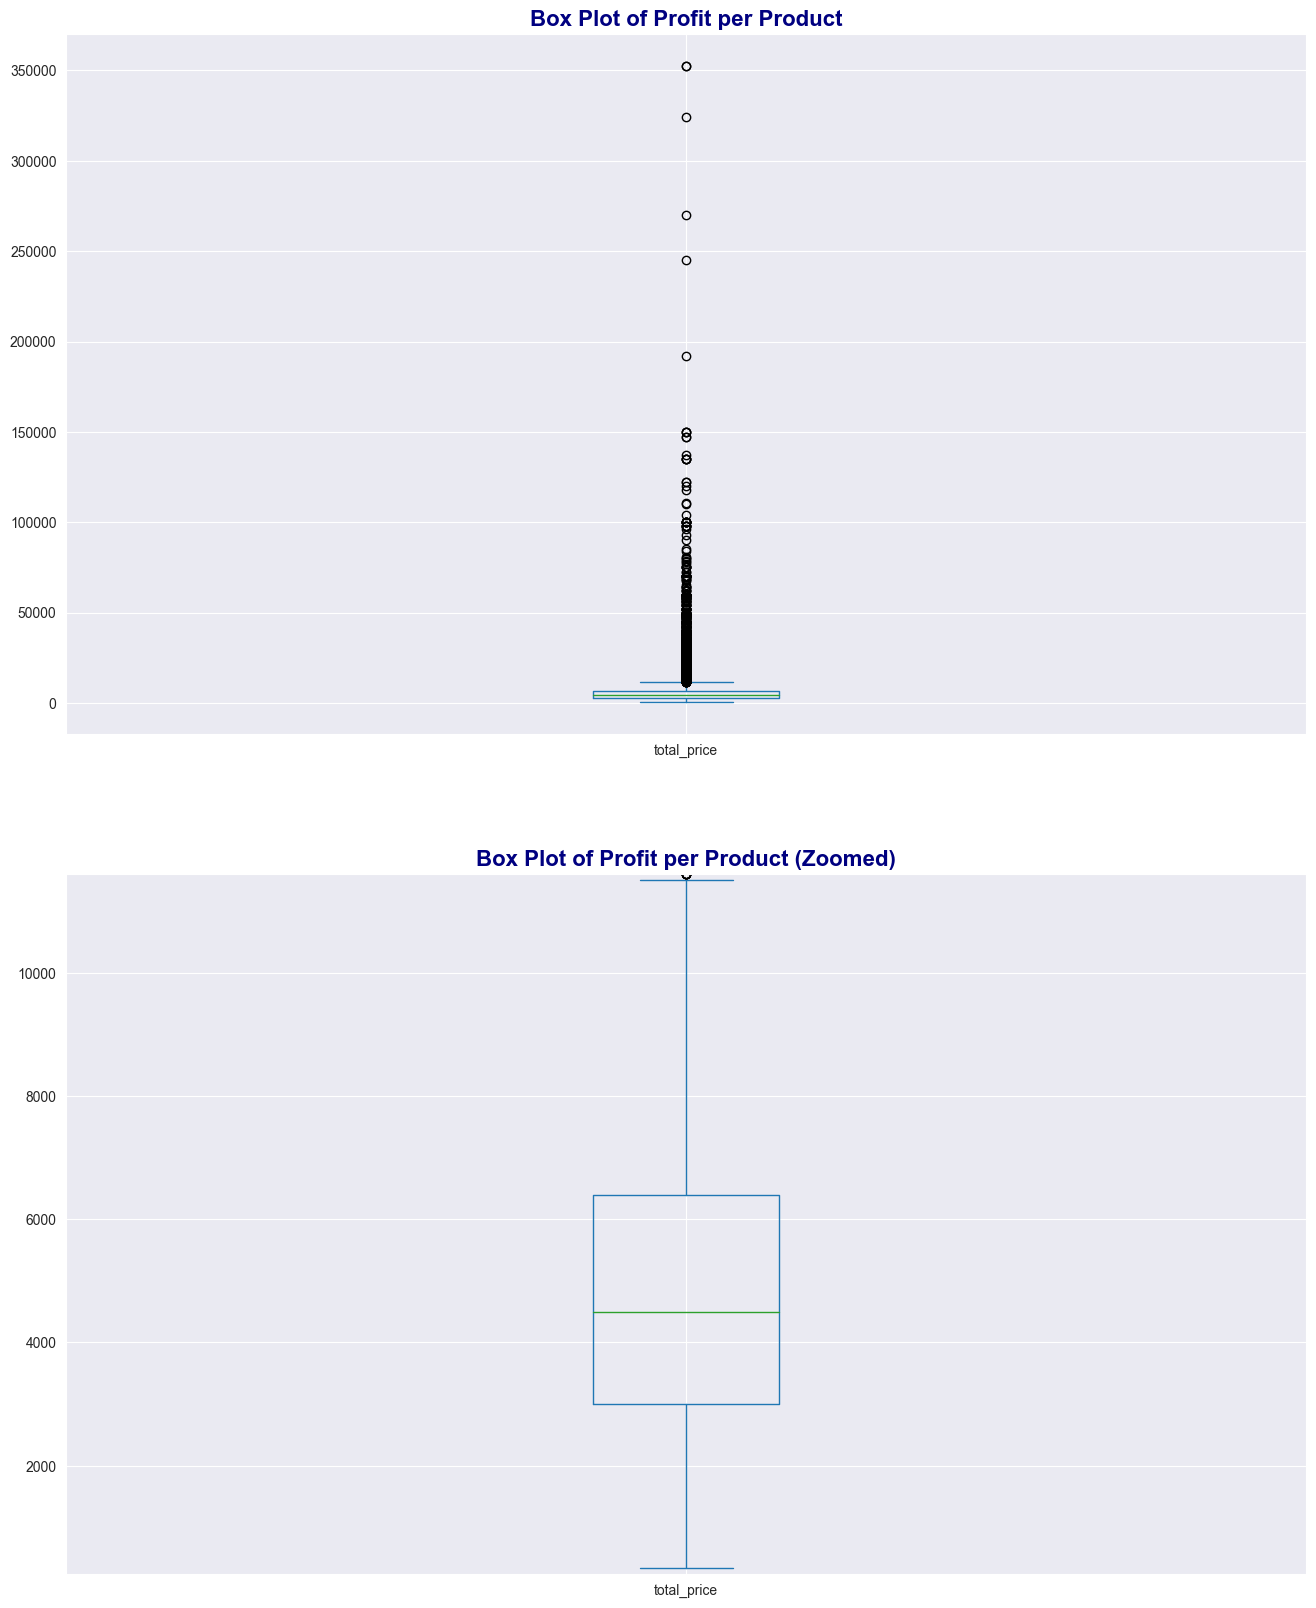

In [81]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16,20))
ex_cheap_df.total_price.plot.box(ax=axs[0])
ex_cheap_df.total_price.plot.box(ax=axs[1])
axs[1].set_ylim(bottom = ex_cheap_df.total_price.min()-100, top = ex_cheap_df.total_price.quantile(0.75)+5200)
axs[0].set_title('Box Plot of Profit per Product',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
axs[1].set_title('Box Plot of Profit per Product (Zoomed)',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});


The box plot suggests that the majority of products have a profit value ranging between 340 and 12000, with a median value of 4500. The fact that the median is below the 75th percentile value of 6400 indicates that the data may be skewed towards lower profit values. The lower quartile value of 3000 suggests that 25% of the products have profits lower than 3000.

The presence of outliers beyond the whiskers of the box plot indicates that there may be some products with unusually high profits. The outliers ranging from 12000 to 352500 suggest that there are some products that have much higher profits than the rest of the data. These outliers may represent high-value products, or products that have a particularly high profit margin.

The fact that the right whisker is at 340 suggests that there may be some products that are generating very low profits or even losses. It may be worth investigating these products further to determine whether they are contributing to overall profitability or whether they should be re-evaluated or removed from the product line.

Overall, the box plot for profits suggests that there is a wide range of profitability for your products, with some products generating much higher profits than others. The presence of outliers may indicate opportunities for optimizing profits through pricing or product strategies, while the low end of the range may indicate areas where further improvement or adjustment is needed to increase profitability.

# How much money the company has been earning each month since 2021?

In [82]:
total_price_df = ex_cheap_df.groupby(['purchase_year','purchase_month'], as_index=False)['total_price'].sum()

Creating a DataFrame grouping by columns 'purchase_year' and 'purchase_month', summing over 'total_price'

In [83]:
total_price_df

purchase_year  purchase_month  total_price
0            2021               1       284710
1            2021               2       473850
2            2021               3       781850
3            2021               4       801280
4            2021               5      1209340
5            2021               6       384360
6            2021               7      1727280
7            2021               8      4586150
8            2021               9      4728650
9            2021              10      5181100
10           2021              11      5733000
11           2021              12      5328490
12           2022               1      8988580
13           2022               2      6571730
14           2022               3      7994230
15           2022               4      5957200
16           2022               5      7921350
17           2022               6      8102640
18           2022               7      8518920
19           2022               8      7734120
20           2022               9      6730880
21           2022              10      6666690
22           2022              11     10230940
23           2022              12     15458370
24           2023               1     10684850
25           2023               2      8002750
26           2023               3      4232400

The final result is show in the above table

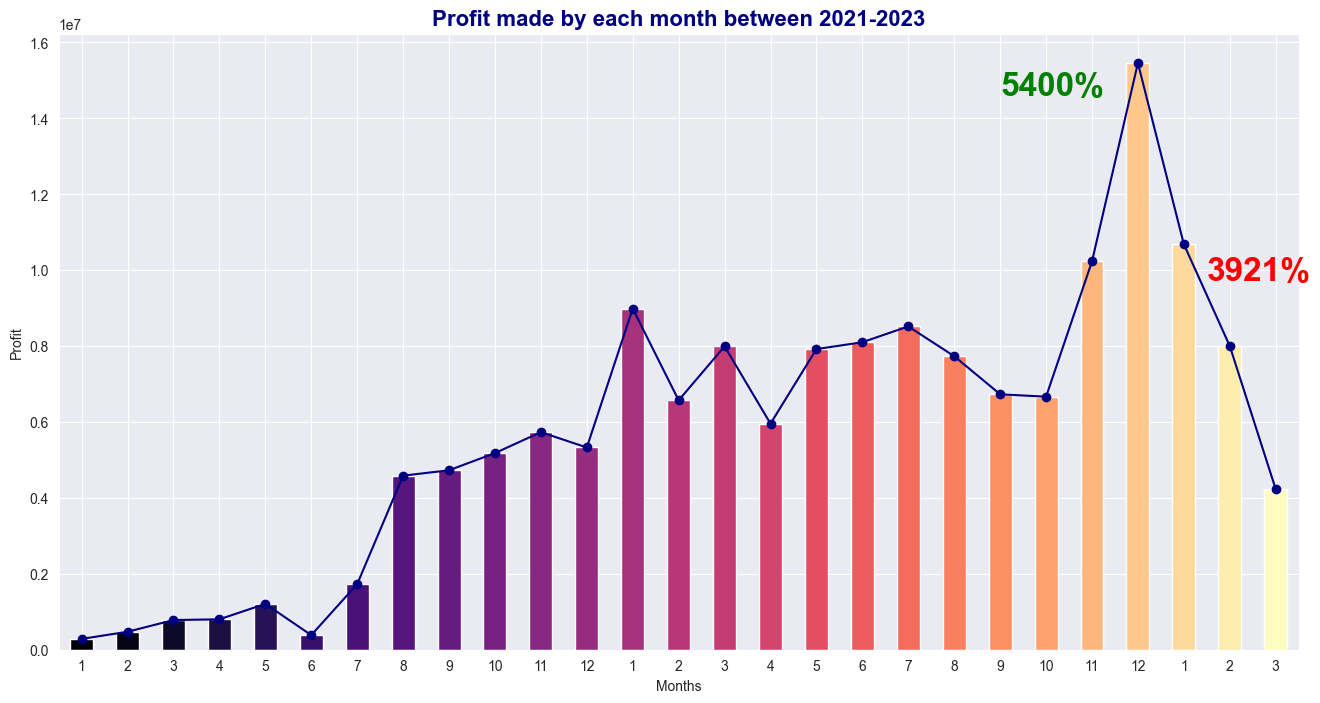

In [84]:
# Getting a colormap 'magma'
c = plt.get_cmap('magma')

# Creating subplots
fig, ax = plt.subplots(figsize=(16,8))

# Creating a bar plot
total_price_df.plot.bar(x='purchase_month',
                        y='total_price',
                        color=c(np.linspace(0,1,len(total_price_df.purchase_month))),
                        legend=False,
                        ax=ax)

# Drawing a line
ax.plot(total_price_df.index, total_price_df.total_price, linestyle='-', marker='o',color='navy')

# Setting up the title, x and y labels
ax.set_title(f'Profit made by each month between {total_price_df.purchase_year.unique()[0]}-{total_price_df.purchase_year.unique()[-1]}',
          fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
ax.set_xlabel('Months')
ax.set_ylabel('Profit')

# Creating some texts
ax.text(x=total_price_df.total_price.idxmax()-3,
        y=0.9,
        s='{}%'.format(total_price_df.total_price.max()//total_price_df.total_price.min()*100),
        fontdict={'fontname':'Arial','fontsize':24,'fontweight':'bold','color':'green'},
        transform=ax.get_xaxis_transform())

percent = int(5400 - total_price_df.loc[((total_price_df.purchase_year == 2023)&(total_price_df.purchase_month==3)).idxmax(),'total_price'] / total_price_df.total_price.max()*5400)

ax.text(x=total_price_df.total_price.idxmax()+1.5,
        y=0.6,
        s='{}%'.format(percent),
        fontdict={'fontname':'Arial','fontsize':24,'fontweight':'bold','color':'red'},
        transform=ax.get_xaxis_transform())

ax.set_xticklabels(total_price_df['purchase_month'], rotation=360);

### Overall, profit increased by 5400% just in 2 years starting from january 2021 till December 2022. However, since the end of 2022, the profit dropped by 3921% which is a huge drop. 

# Which seller has made the highest number of sales since 2021?

In [85]:
sellers_df = sales_df[['seller_id','sold_amount','total_price','purchase_year','purchase_month']]

First we create a new dataframe with particular columns

In [86]:
sellers_df

seller_id  sold_amount  total_price  purchase_year  purchase_month
id                                                                         
3b1c962d  9f04044e            3         2100           2021               1
fe479b28  9f04044e            3         2550           2021               1
1467a16c  c5abb107            6        16800           2021               1
b7793441  9f04044e            3         2550           2021               1
4d52e36f  c5abb107            6         5520           2021               1
...            ...          ...          ...            ...             ...
4f84b7cd  9f04044e            2         3200           2023               3
4bac3816  9f04044e            3         2700           2023               3
1f041122  c5abb107           10         9000           2023               3
199cc5f8  9f04044e            6         5400           2023               3
df70bf9d  9f04044e            4         6400           2023               3

[25158 rows x 5 columns]

This is how dataframe looks like

In [87]:
sellers_by_sale = sellers_df.groupby(['seller_id'])[['total_price']].sum()

Grouping the data by seller's id, summing total profit per product at each sale

In [88]:
sellers_by_sale = sellers_by_sale.rename(columns={'total_price':'Total Profit'})

Renaming the column 'total_price' to 'Total Profit'

In [89]:
sellers_by_sale

Total Profit
seller_id              
490dc6e8        4755290
53de5b54        5447290
9f04044e       36159280
c5abb107      108653850

This is how grouped dataframe looks like

Text(0.5, 1.0, 'Total Sale ($) Made by Sellers')

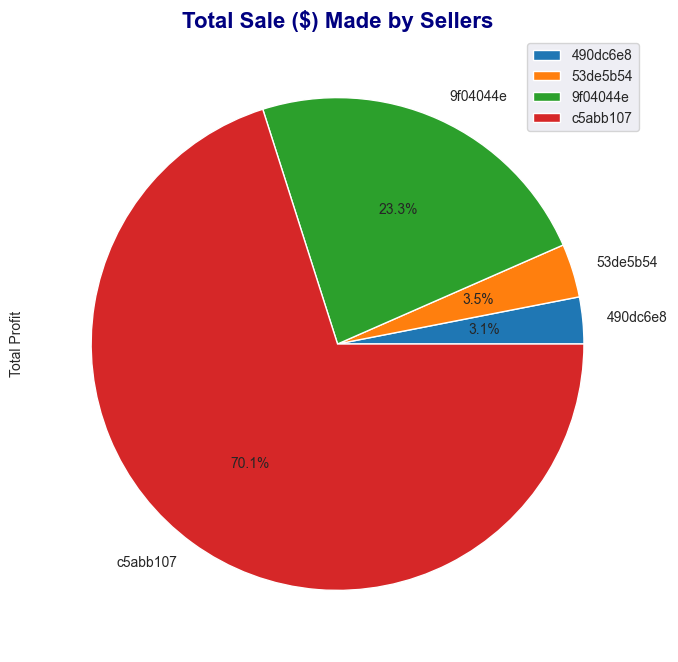

In [90]:
fig, ax = plt.subplots(figsize=(16,8))
sellers_by_sale.plot.pie(y='Total Profit', autopct='%.1f%%' , ax=ax)
ax.set_title('Total Sale ($) Made by Sellers',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})



Based on the pie chart:
* c5abb107 made up 70.1% of all sales so far.
* 9f04044e is in the second place with 23.3%.
# Next question is: Why there is a huge difference in total sales made by sellers? 

In [91]:
sellers_year = sellers_df.groupby(['purchase_year','seller_id'])['total_price'].sum().unstack(fill_value=0)

Creating a pivoted dataframe with multiindices, where seller_id values will become columns and purchase_year values will be row indices; Nan values will be converted to 0.

In [92]:
sellers_year

seller_id      490dc6e8  53de5b54  9f04044e  c5abb107
purchase_year                                        
2021                  0   5002750   6961460  19255850
2022            4755290    444540  13341070  82334750
2023                  0         0  15856750   7063250

This is how new pivoted dataframe will look like

Text(0, 0.5, 'Total Sale ($)')

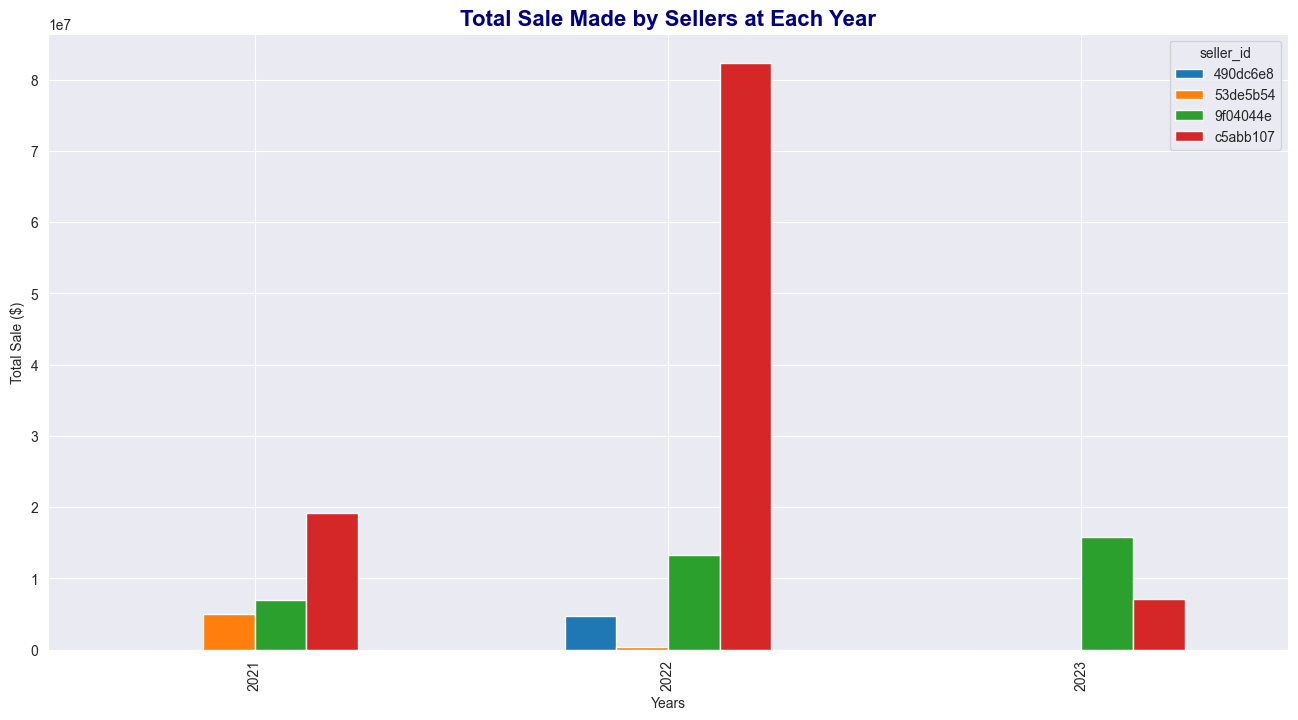

In [93]:
sellers_year.plot.bar(figsize=(16,8))
plt.title('Total Sale Made by Sellers at Each Year', 
          fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
plt.xlabel('Years')
plt.ylabel('Total Sale ($)')

Well, the following facts can be drawn from the graph above:
* In 2021, there were only 3 sellers and c5abb107 was the leading seller with the highest number of sales.
* In 2022, a new seller started to operate, namely with ID 490dc6e8.
* In comparison with 2021, in 2022, seller 53de5b54 made much less sales, while other previous sellers obviously progressed over time, especially c5abb107.
* The sales made by c5abb107 is for unknown reasons really high, so why is that the case?
* In 2023, there were operating only 2 sellers, namely 9f04044e and c5abb107. It explains why the total sale of these sellers is much higher. However, c5abb107 made much less sales since 2021, as it was the lowest one for this seller, while 9f04044e as in previous year made a gradual progress upward.

In [94]:
sellers_df[(sellers_df.purchase_year == 2021)].groupby(['purchase_month','seller_id'])['total_price'].sum().unstack(fill_value=0)

seller_id       53de5b54  9f04044e  c5abb107
purchase_month                              
1                      0    107860    176850
2                      0    103700    370150
3                  58400    229350    494100
4                 151900    172640    476740
5                  30900    145870   1032570
6                 161500     83640    139220
7                 271650    694050    761580
8                  92000   1281890   3212260
9                 541300   1088330   3099020
10                873000   2056400   2251700
11               1058520    377250   4297230
12               1763580    620480   2944430

It looks like the seller with ID 53de5b54 started to operate in March.

In [95]:
sellers_df[(sellers_df.purchase_year == 2022)].groupby(['purchase_month','seller_id'])['total_price'].sum().unstack(fill_value=0)

seller_id       490dc6e8  53de5b54  9f04044e  c5abb107
purchase_month                                        
1                 728200         0    591300   7669080
2                2220380         0    933600   3417750
3                 370860         0    456850   7166520
4                 225350         0    227900   5503950
5                      0    165600    473000   7282750
6                      0         0   2066610   6036030
7                 751800    278940   3114580   4373600
8                  62600         0   2308570   5362950
9                 149400         0   1160550   5420930
10                 31200         0     61500   6573990
11                215500         0    738210   9277230
12                     0         0   1208400  14249970

The seller 53de5b54 worked only on May and July, while 490dc6e8 has been selling between January-April and July-November, skipping 3 months in total.
Possible explanation for c5abb107 success in 2022 could be:
1. Since there were times when only 3 sellers were operating most of the time, presumably, the worklode has been handled by c5abb107. It could explain the sudden increase in sale numbers for this seller.
2. However, it is almost unbelievable that only c5abb107 was working with clients, since there were other sellers too. Then the next assumption is c5abb107 had a high credibility and customers' trust on this seller was indeed at high level.
3. Another reason could be: c5abb107 worked non-stop; if we assume this seller has been working without taking any brakes, and getting sick or whatever, while others indeed had these 'brakes', then, obviously, this seller's high results could be justified. Without any further data this is, for now, all I can say. 

# Since there are only two sellers who started to operate in 2023, what predictions we can make regarding their future effectiveness?

In [96]:
seller_pred = sellers_df.groupby(['purchase_year','seller_id'], as_index=False)['total_price'].sum()

In [97]:
seller_pred

purchase_year seller_id  total_price
0           2021  53de5b54      5002750
1           2021  9f04044e      6961460
2           2021  c5abb107     19255850
3           2022  490dc6e8      4755290
4           2022  53de5b54       444540
5           2022  9f04044e     13341070
6           2022  c5abb107     82334750
7           2023  9f04044e     15856750
8           2023  c5abb107      7063250

Creating the DataFrame grouped by purchase_year and seller_id, summing all corresponding values of column total_price

In [98]:
seller_pred = seller_pred.drop(index=seller_pred[(seller_pred.seller_id=='490dc6e8') | (seller_pred.seller_id=='53de5b54')].index)

Removing the rows of sellers who are not operating in 2023

In [99]:
seller_pred.seller_id = pd.Categorical(seller_pred.seller_id)

Converting seller_id column values to category dtype

In [100]:
first = seller_pred[seller_pred.seller_id=='9f04044e']
second = seller_pred.drop(index=first.index)

Creating two dataframes, separating the rows by seller ids

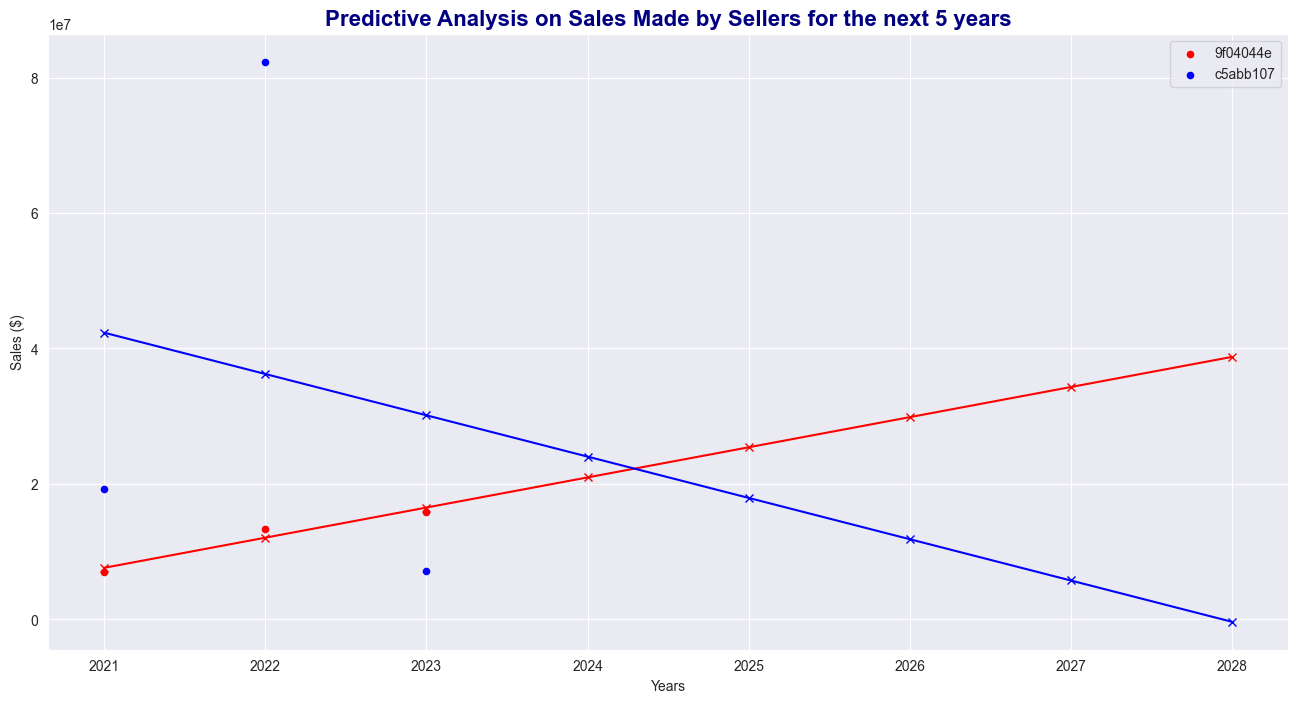

In [101]:
slopef, interceptf, rvaluef, pvaluef, stderrf = scipy.stats.linregress(x=first.purchase_year, y=first.total_price)
slopes, intercepts, rvalues, pvalues, stderrs = scipy.stats.linregress(x=second.purchase_year, y=second.total_price)

xf_val = np.arange(first.purchase_year.min(), first.purchase_year.max()+6)
yf_val = np.array(slopef*xf_val + interceptf)

xs_val = xf_val.copy()
ys_val = np.array(slopes*xs_val + intercepts)

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(16,8))

first.plot.scatter(x='purchase_year', 
                   y='total_price',  
                   c='red',
                   ax=ax)

second.plot.scatter(x='purchase_year', 
                   y='total_price',  
                   c='blue',
                   ax=ax)

ax.set_title('Predictive Analysis on Sales Made by Sellers for the next 5 years',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
ax.set_xlabel('Years')
ax.set_ylabel('Sales ($)')

ax.plot(xf_val, yf_val, color='red', marker='x')
ax.plot(xs_val, ys_val, color='blue', marker='x')

ax.legend(seller_pred.seller_id.unique())


plt.xticks(xf_val);

Based on the above graph following can be drawn:
* Despite being the leader in last years, seller's (IDc5abb107) sale results will drop gradually in the next 5 years based on the linear regression model.
* While the seller (ID9f04044e) who always been in the second place, starting from, approximately 1st half of 2025, will surpass the first seller.
* In the next 5 years, this difference will increase even more, making the seller (ID9f04044e) the most effective one.

# Asking and Answering Questions

### Q1: Based on the sales made so far, what predictions we can make by the end of 2023?

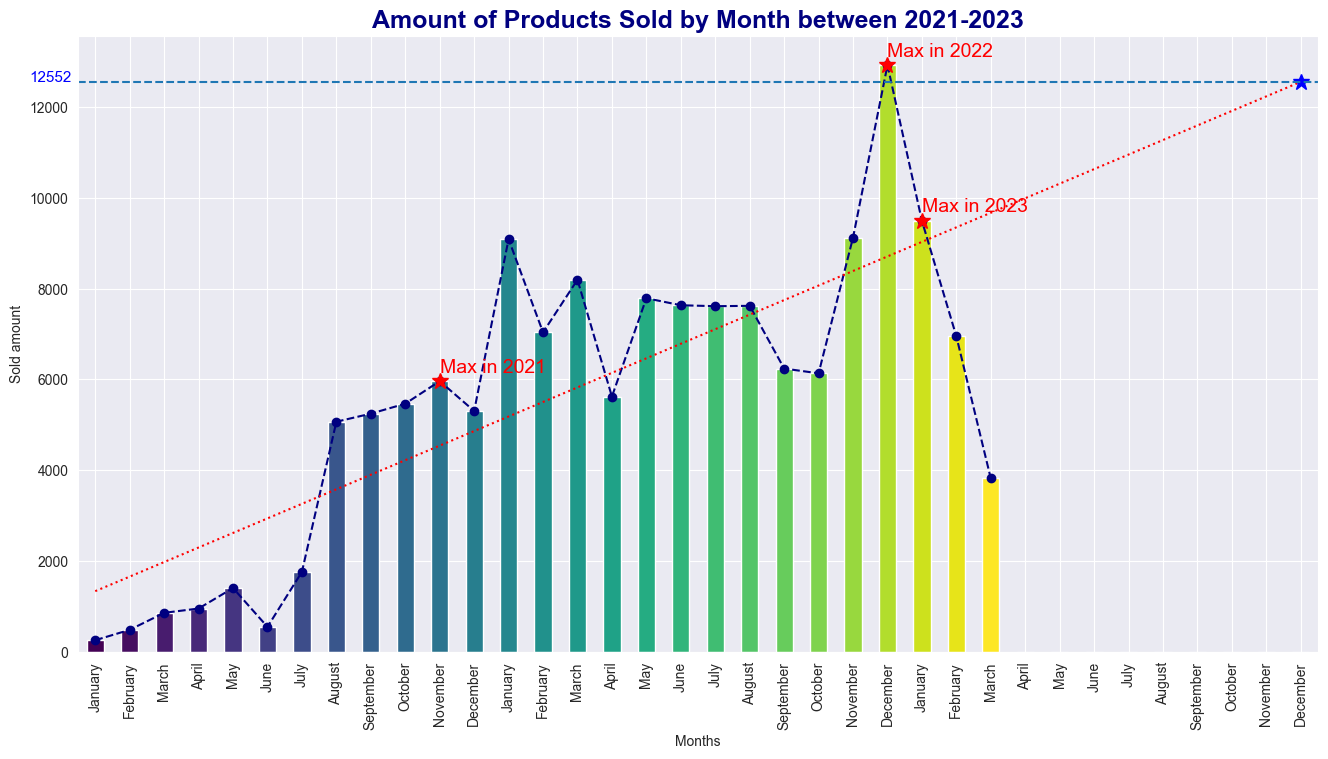

In [102]:
# Getting colormap names 'viridis'
colors = plt.get_cmap('viridis')

# Taking values of slop, interseption and other parameters using linregress() function of scipy library
k, y_, r, p, err = scipy.stats.linregress(amount_sold_by_month_df.index, amount_sold_by_month_df.sold_amount)

# Calculating the new x and y values based on slope and interception 
x_val = np.arange(0, len(amount_sold_by_month_df.index)+9)
y_val = k*x_val + y_

# Adding extra rows to show how regression line will behave during 2023
df = pd.concat([amount_sold_by_month_df, pd.DataFrame(np.array([[2023]*9,
                                                               pd.to_datetime(np.arange(4,13), format='%m').month_name().values,
                                                               [0]*9]).T, columns=amount_sold_by_month_df.columns)], ignore_index=True)

# Plotting a bar chart
df.plot.bar(x='purchase_month', y='sold_amount', color=colors(np.linspace(0,1,len(amount_sold_by_month_df.purchase_month))), figsize=(16,8), legend=False)

# Plotting a line chart that passes through the top points of each bar
plt.plot(amount_sold_by_month_df.index, amount_sold_by_month_df['sold_amount'], 
         marker='o', 
         linestyle='--', 
         color='navy')

# Plotting the regression line
plt.plot(x_val, y_val, linestyle=':', color='red')

# Setting title and labels
plt.title('Amount of Products Sold by Month between {}-{}'.format(amount_sold_by_month_df.purchase_year.unique()[0], amount_sold_by_month_df.purchase_year.unique()[-1]),
          fontdict={'fontname':'Arial','fontsize':18,'fontweight':'bold','color':'navy'})
plt.ylabel('Sold amount')
plt.xlabel('Months')

for year in amount_sold_by_month_df.purchase_year.unique():
    
    # Creating a new DataFrame with a unique year value
    df_ = amount_sold_by_month_df.loc[amount_sold_by_month_df.purchase_year==year]
    
    # Taking the highest value in column 'sold_amount'
    max_amount = amount_sold_by_month_df.loc[df_.sold_amount.idxmax(),'sold_amount']
    
    # Taking the index value of corresponding max value in the DataFrame
    index_max = df_.sold_amount.idxmax()

    # Plotting points with the hihgest values
    plt.plot(index_max, max_amount, 
             marker='*',
             markersize=12, 
             color='red'
             )
    
    # Adding texts above the highest points
    plt.text(index_max,
             max_amount+200,
             'Max in {}'.format(year),
             fontdict={'fontname':'Arial','fontsize':14,'fontweight':'light','color':'red'}
             )

# Plotting the point number of sales might achieve by the end of 2023
plt.plot(x_val[-1], y_val[-1],
         marker='*',
         markersize=12,
         color='blue')

# Plotting the horizontal line corresponding to the value of sales by the end of 2023
plt.axhline(y=y_val[-1], linestyle='--')

# Texting the value of sales on y axis
plt.text(-1.9,y_val[-1],
         f'{int(y_val[-1])}',
         fontdict={'fontname':'Arial','fontsize':11, 'fontweight':'light','color':'blue'})

# Rotating x values to 90 degree
plt.xticks(rotation=90);

Based on the graph above, the following results can be drawn:
* According to our estimations, by the end of 2023, the number of sales might attain 12552 sales. In comparison with the last year, it is a bit less, but the fact that regression line is directed upward hints about even more big sale numbers in the future despite huge drop at the start of 2023.
* Interestingly, everytime, approximately at last months of each year, namely 2021 and 2022, number of sales has been achieving the highest results. Based on this interesting finding, we might assume the highest sales by the end of 2023.

# Q2: Based on the days when purchases were made, what can we tell about the purchase behaviour of customers?

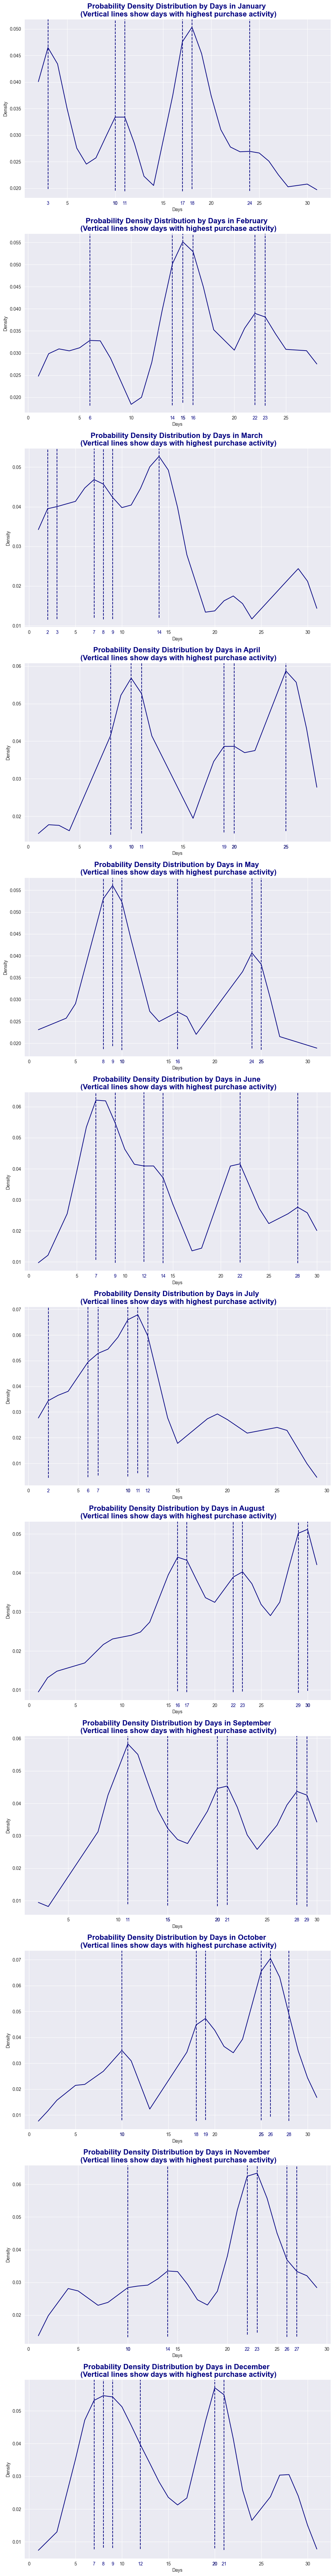

In [103]:
# We use plt.subplots() and set nrows to number of month (from 1 to 12) 
fi,axs = plt.subplots(nrows=len(purchase_made_by_day_df.purchase_month.unique()), ncols=1, figsize=(12,100))

# We need to use a for loop and enumerate() to get the index and value of unique months to work with each of them separately
for i, month in enumerate(purchase_made_by_day_df.purchase_month.unique()):
    
    # We take the values of column 'purchase_day' only working with the particular month and save it in 'data'
    data = purchase_made_by_day_df.loc[purchase_made_by_day_df.purchase_month==month, 'purchase_day']
    
    # We need to work with Series so as the data we took values of data, setting the index from 0 to the number
    # of elements in 'data', naming the Series 'purchase_day'
    
    for j in range(6):
        
        data_s = pd.Series(data=data.values, index=np.arange(0,len(data)), name='purchase_day')

        # We create an object with estimated pdf values of 'data' 
        density = gaussian_kde(data_s)

        # Next, we refer to pdf values using density(data) and take the index of corresponding max pdf value
        # using .argmax(). This index is passed to 'data' as the coordinate to take the value corresponding to
        # this index and save it in x_max_density.
        x_max_density = data_s[density(data_s).argmax()]

        # We draw the vertical line that passes through the purchase day with the highest purchase activity
        axs[i].axvline(x_max_density, density(x_max_density), color='navy', linestyle='--')
  
        # We add the purchase day labels on x-axis below the vertical line
        axs[i].text(x_max_density, -0.018, '{}'.format(x_max_density), fontdict={'color':'navy'}, ha='center', va='top', transform=axs[i].get_xaxis_transform())

        if j==0:
        
            # We convert the Series to DataFrame using .to_frame()
            data = data_s.to_frame()

            # We draw the line graph setting purchase_day values on x-axis, and its density values on y-axis
            axs[i].plot(data.purchase_day.unique(), density(data.purchase_day.unique()), color='navy')

        # Since we want to find the value corresponding to the second highest pdf value, then obviously we need
        # eliminate the highest one from the Series using .drop() function, dropping all the indices corresponding
        # max value from the Series and saving it in data2
        data = data_s.drop(index=data_s[data_s.values == x_max_density].index)
    
        
    
    # Then we set title, x_label and y_label
    axs[i].set_title('Probability Density Distribution by Days in {} \n (Vertical lines show days with highest purchase activity)'.format(month),
                     fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    axs[i].set_xlabel('Days')
    axs[i].set_ylabel('Density');

Based on the graph above we can observe the following interesting facts:
* First, the purchase activity of customers is not equally distributed through days i.e. there are days when activity is indeed really high, and vice versa significantly low.
* Second, there is a period of 'low' activity between each high purchase activity days, namely, about 7 days. Roughly speaking, the same customer makes a purchase every week. 
* Based on the above findings, we can conclude that the purchases were made offline since there is a pattern of seven days between each high activity purchase day. If it was an online store then I assume there would be a kind of uniformity, ignoring special days when there are holidays.

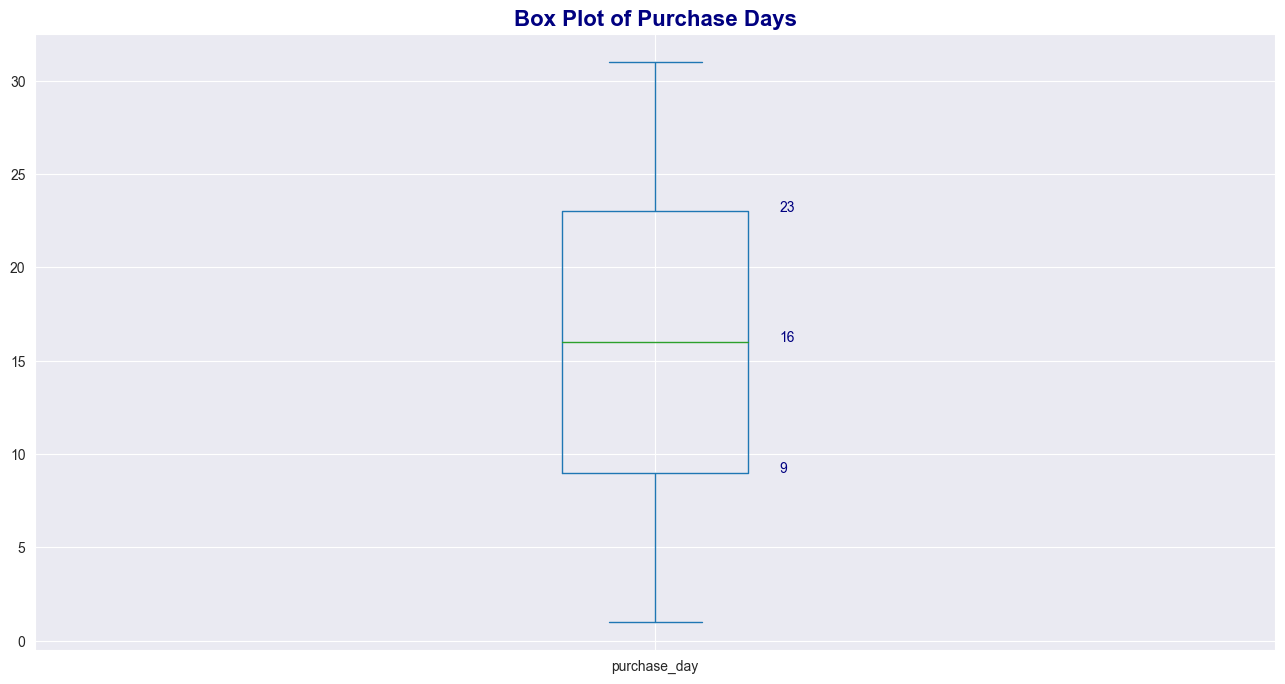

In [104]:
fig, ax = plt.subplots()
ex_cheap_df.purchase_day.plot.box(figsize=(16,8),ax=ax)
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.quantile(0.25),
        s='{}'.format(int(ex_cheap_df.purchase_day.quantile(0.25))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.quantile(0.75),
        s='{}'.format(int(ex_cheap_df.purchase_day.quantile(0.75))),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.text(x=0.6,
        y=ex_cheap_df.purchase_day.median(),
        s='{}'.format(int(ex_cheap_df.purchase_day.median())),
        fontdict={'fontname':'Arial','color':'navy'},
        transform = ax.get_yaxis_transform())
ax.set_title('Box Plot of Purchase Days',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'});

* Based on the box plot we see that majority of purchases were made between 9th and 23rd Days of the month since 2021 January. 
* Since median value is exactly in the middle and not shifted to either sides, then we can say purchases were made equally as close to 9th and 23rd Days i.e. roughly speaking equal number of purchases were made between 9 and 23 Days at each day.
* This fact again proves that there is a pattern of 'seven days' between each purchase made by the same customer.

In [105]:
amount_by_day_df = amount_sold_by_day_df.drop(columns='purchase_month')

Since we are interested in days only, we can drop the 'purchase_month' column

In [106]:
amount_by_day_df = amount_by_day_df.groupby(['purchase_day'])['sold_amount'].mean()

We group the data by 'purchase_day', summing the 'sold_amount' values. Thus we obtain number of products sold at each day ignoring the year or the month when products were sold.

In [107]:
amount_by_day_df = amount_by_day_df.reset_index()

We reset the index to obtain default index values starting from 0

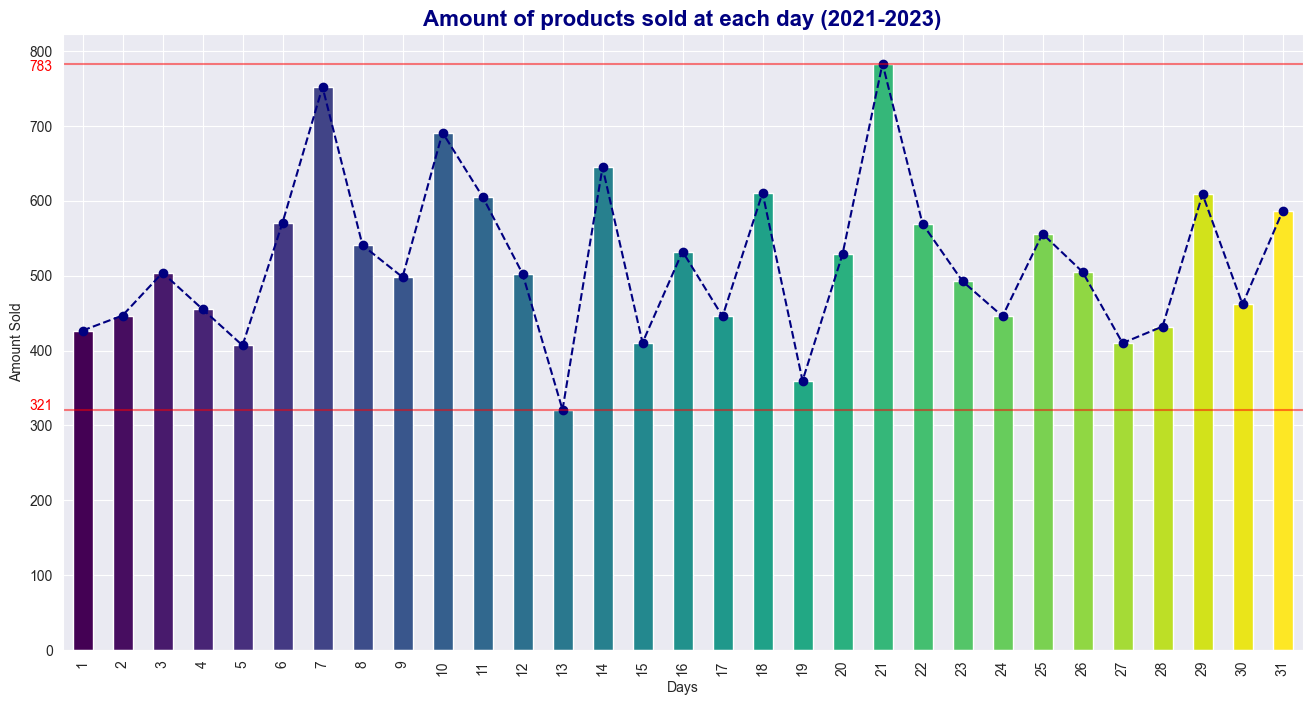

In [108]:
# Creating onesubplot only with size 16 to 8
fig, ax = plt.subplots(figsize=(16,8))

# Drawing a bar plot setting purchase days on x-axis, and sold amount on y-axis
amount_by_day_df.plot.bar(x='purchase_day', 
                               y='sold_amount', 
                               color=colormap(np.linspace(0,1,len(amount_by_day_df.purchase_day.unique()))),
                               legend=False,
                               ax=ax)

# Drawing the line plot that passes through the top of the bars
ax.plot(amount_by_day_df.index,
         amount_by_day_df.sold_amount, 
         marker='o', 
         color='navy', 
         linestyle='--')

# Drawing horizontal lines with corresponding maximum and minimum sold_amount values
ax.axhline(amount_by_day_df.sold_amount.min(),
            color='red',
            alpha=0.5)
ax.axhline(amount_by_day_df.sold_amount.max(),
            color='red',
            alpha=0.5)

# Writing down the max and min values next to horizontal lines
ax.text(-0.027, 
         amount_by_day_df.sold_amount.min(), 
         '{}'.format(int(amount_by_day_df.sold_amount.min())),
         transform = ax.get_yaxis_transform(),
         fontdict={'color':'red'}
         )
ax.text(-0.027, 
         amount_by_day_df.sold_amount.max()-10, 
         '{}'.format(int(amount_by_day_df.sold_amount.max())),
         transform = ax.get_yaxis_transform(),
         fontdict={'color':'red'}
         )

# Creating title and label names
ax.set_title('Amount of products sold at each day (2021-2023)', 
          fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
ax.set_ylabel('Amount Sold')
ax.set_xlabel('Days');


Based on our analysis, we can observe interesting insights:
* In average, the highest number of products have been selling in Day 7 and Day 21, reaching the number of sales between 750 and 800.
* Since 2021, the lowest number of products has been selling didn't go below 321 products. So with high probability we can say that if nothing will change the current customers flow, then the minimum number of products this company can sell might never go below 321.

# Q3: What are the top products customers prefered the most since 2021?

In [109]:
top_products = top_products.reset_index(drop=True)

Resetting the index values of DataFrame 'top_products' without converting the previous indices to a new column (that's why drop=True)

In [110]:
top_products_by_year = top_products.groupby(['purchase_year','product_id'], as_index=False)['sold_amount'].sum()


Creating new DataFrame by grouping the 'top_products' by columns 'purchase_year' and 'product_id', summing over 'sold_amount' values

In [111]:
top_products_by_year.loc[top_products_by_year.sold_amount==top_products_by_year.sold_amount.min(),'sold_amount']


1      0
2      0
4      0
5      0
6      0
      ..
466    0
467    0
468    0
469    0
470    0
Name: sold_amount, Length: 407, dtype: int64

While creating top_products_by_year DataFrame there were created some rows with 'sold_amount' values equal to 0. Better to eliminate them from the DataFrame.

In [112]:
top_products_by_year = top_products_by_year.drop(index=top_products_by_year[top_products_by_year.sold_amount==top_products_by_year.sold_amount.min()].index)


Dropping the rows that correspond to zeros in 'sold_amount' using .drop(index)

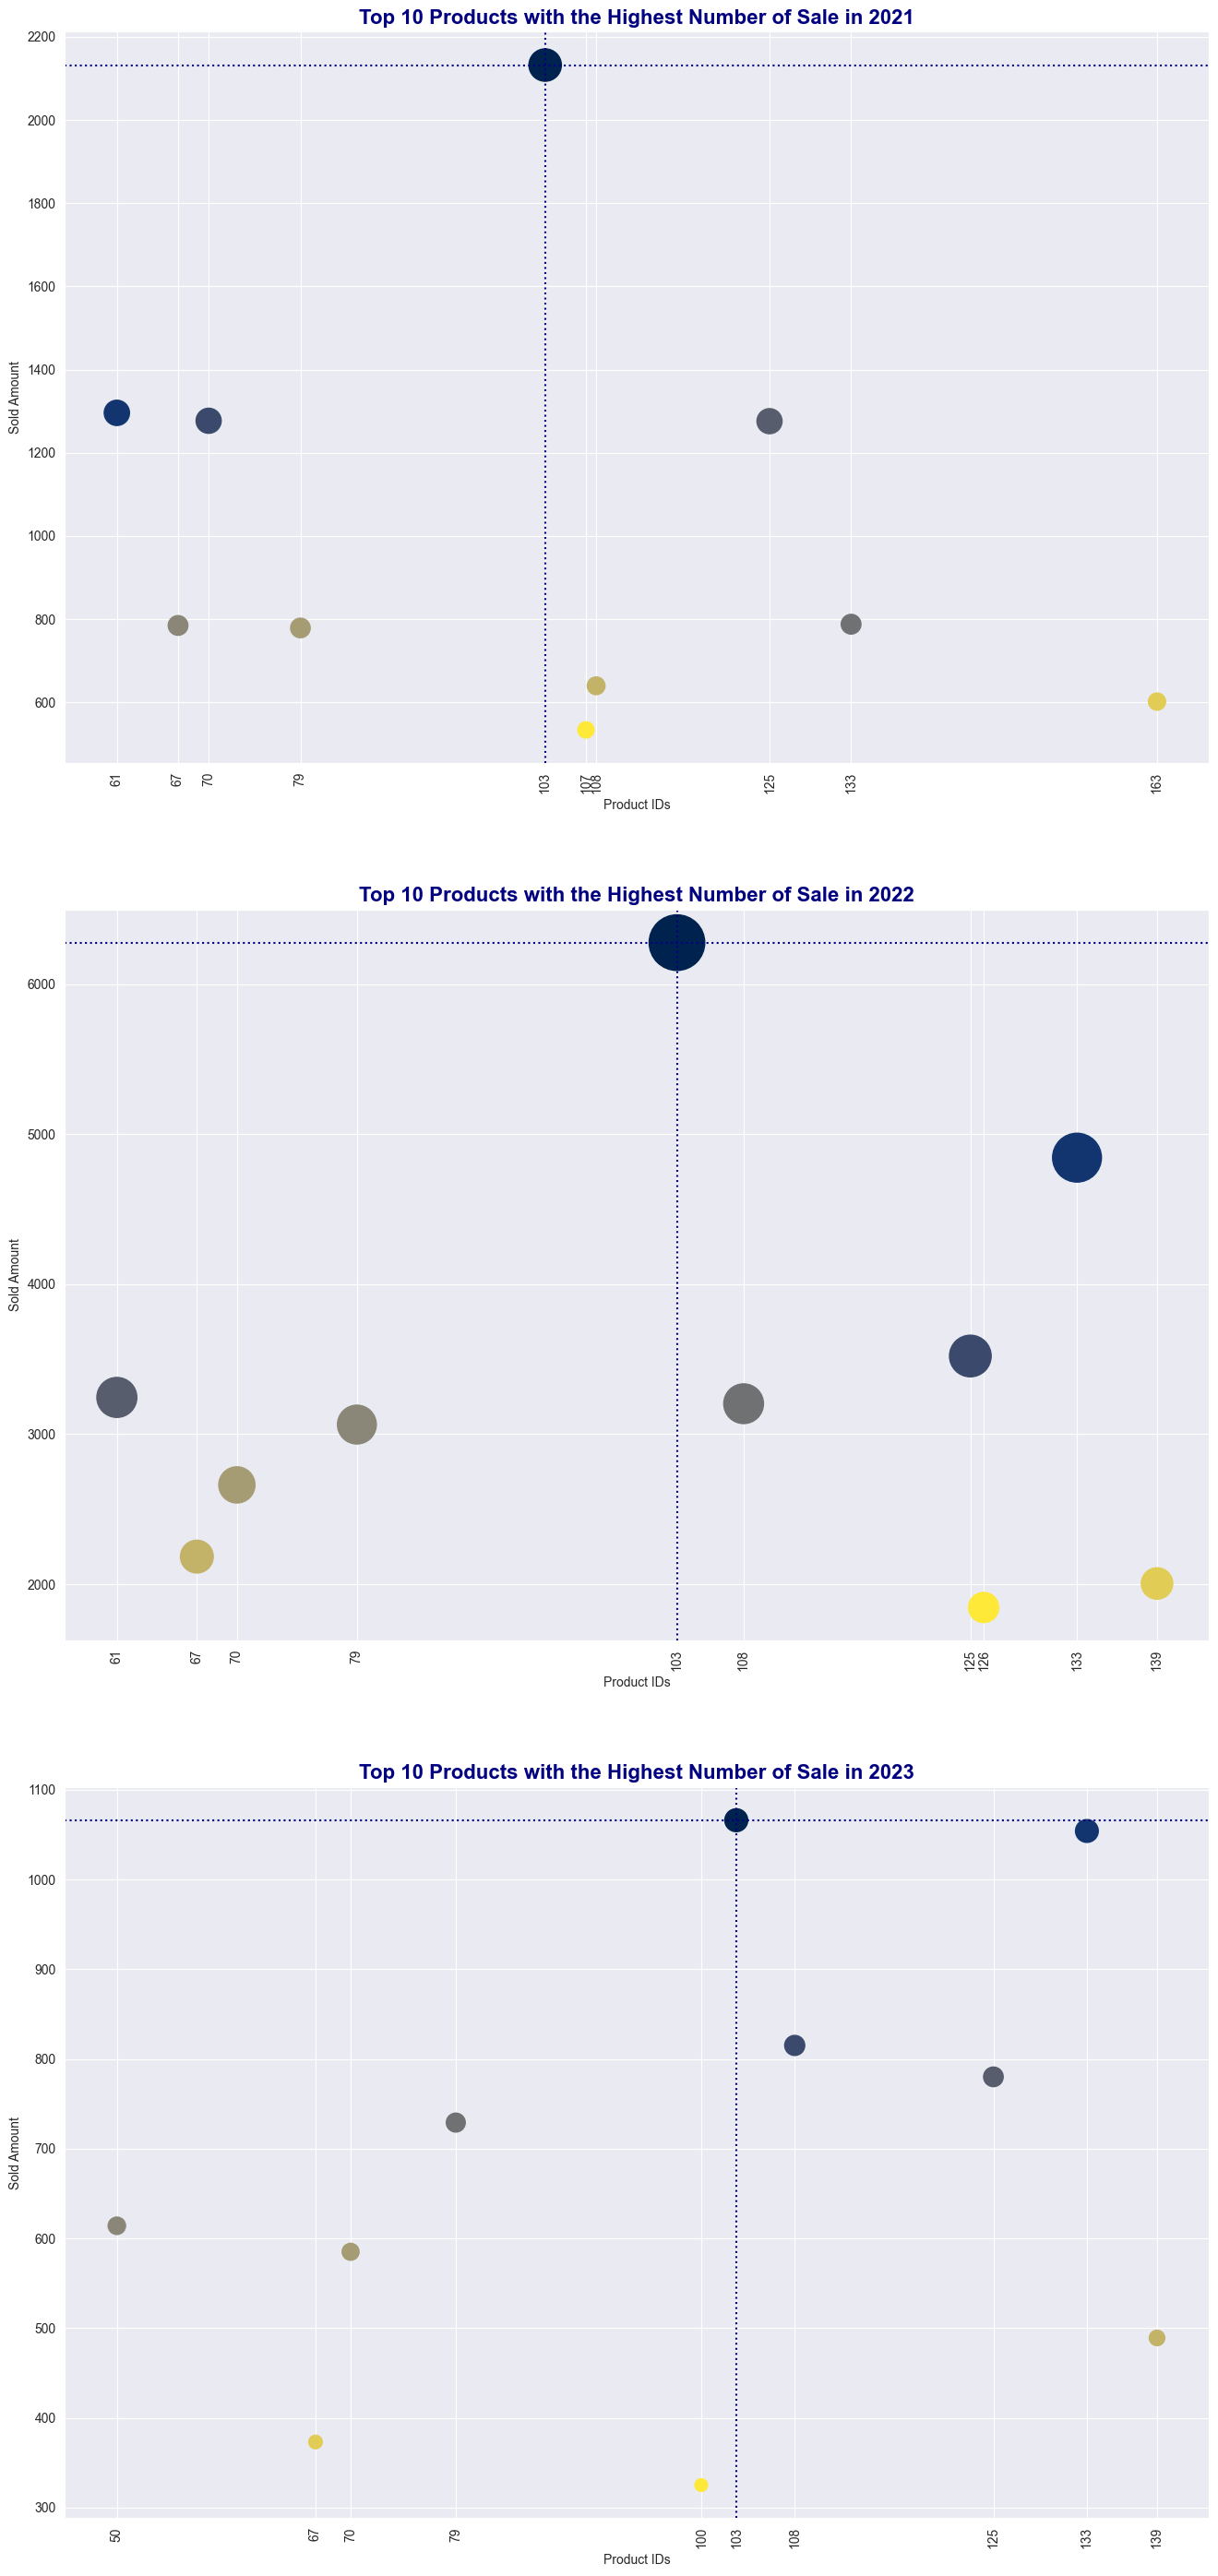

In [113]:
# Creating subplots with rows equal to the number of unique years, and columns equal to 1 with figure size 16 x 35
fig, axs = plt.subplots(nrows=len(top_products_by_year.purchase_year.unique()), ncols=1, figsize=(16,35))

# Getting the colormap named 'viridis'
cmp = plt.get_cmap('cividis')

# Creating an empty set
top_product_ids = set()

# Creating for loop going a number of times equal to unique year numbers in DataFrame
for i,year in enumerate(top_products_by_year.purchase_year.unique()):

    # Taking the dataset with particular year values
    df = top_products_by_year[top_products_by_year.purchase_year==year]

    # Sorting values by 'sold_amount' in descending order
    df = df.sort_values(by=['sold_amount'], ascending=False)

    # Taking 10 rows on top of the dataset 
    df = df.head(10)
    
    # Adding those product IDs that corresponds to 10 top rows, converting them to tuple 
    # (we convert to tuples since it is immutable)
    top_product_ids.add(tuple(df.product_id.values))

    # Creating a scatter plot with reduced size of dots, 'product_id' in x-axis and 'sold_amount' in y-axis
    df.plot.scatter(x='product_id',
                    y='sold_amount',
                    s=df['sold_amount']-df['sold_amount']*0.7,
                    c=cmp(np.linspace(0,1,len(df.product_id.unique()))),
                    ax=axs[i])
    
    # Setting title, x and y labels
    axs[i].set_title(f'Top 10 Products with the Highest Number of Sale in {year}',
                     fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
    axs[i].set_ylabel('Sold Amount')
    axs[i].set_xlabel('Product IDs')

    # Drawing horizontal and vertical lines passing through max value
    axs[i].axhline(df.sold_amount.max(), linestyle=':', color='navy')
    axs[i].axvline(df.loc[df.sold_amount.idxmax(),'product_id'], linestyle=':', color='navy')
    
    # Setting x-axis parameters, taking not the equal spaced range of values but those values that are in dataset
    axs[i].set_xticks(df['product_id'])
    axs[i].set_xticklabels(df['product_id'], rotation=90);


The interesting result was observed analyzing the following graph. 
* The product with 103 ID was the only product that was leading the race with the highest number of sales at each year. Good to know since improving this product any further can get more dividends in the future. 
* Also producs with 125 and 133 IDs appeared at each year with comparatively high results, which might be a sign to give some attention to these products too, creating some marketing strategies to let to know more and more customers about these products.  

In [114]:
top_7

product_id  sold_amount          product_name
0          103         9480    CANELA ASTILLA X5G
1          103         9480   CANELAS ASTILLA X5G
2          133         6738     AJO MOLIDO X 40 G
3          133         6738     AJO MOLIDO X 20 G
4          125         5619  ADOBO 7 HIERBAS X60G
5          125         5619  ADOBO 7 HIERBAS X90G
6          125         5619      SUPER ADOBO X90G
7           70         5094      CLAVO ENTERO X5G
8          108         4921          CURCUMA X20G
9           79         4697      BICARBONATO X50G
10          67         4441   CANELA ASTILLA X10G
11          67         4441  CANELAS ASTILLA X10G

Based on the results drawn from the graph 'Top 10 Products with the Highest Sale', it's been identified that there are exactly 7 products that are truly popular among customers based on yearly sale analysis i.e. these products are in demand among customers in comparison with other products. Here is the list of products starting with number 1, meaning the most popular:

1. <span style="color:red"> Canela Astilla x5G </span> - the number one product with the highest number of sales thoughout the years, numerically 9480 sales since 2021 January.
2. <span style="color:red"> Ajo Molido x20G and x40G </span> - the second the most popular products in the arsenal of this company, with 6378 sales since the beginning.
3. <span style="color:red"> Adobo 7 Hierbas x60G, X90G and Super Adobo x90G </span> - the third most popular products in the shell. They made up 5619 sales since 2021 of January.
4. <span style="color:red"> Clavo Entero X5G </span> - the product that made the day of many customers as this product is in high demand, so may be this is the reason why this product is the 4th product with 5094 number of sales.
5. <span style="color:red"> Curcuma X20G </span> - following the lead of Clavo Entero X5G, taking the 5th place in number of sales, that is 4921.
6. <span style="color:red"> Bicarbonato X50G </span> - also wasn't left without attention by suctomers as this product among top 7 products with one of the highest number of sales, namely 4697.
7. <span style="color:red"> Canela Astilla X10G </span> - sibling of Canela Astilla x5G but unlike the last product it didn't get the 1st place, but hey 7th place with 4441 sales makes Canela Astilla X10G a hot product ready to be taken away by buyers in any seconds.  

# Q4: Which seller has made the highest number of sales since 2021?

In [115]:
sellers_by_sale

Total Profit
seller_id              
490dc6e8        4755290
53de5b54        5447290
9f04044e       36159280
c5abb107      108653850

Text(0.5, 1.0, 'Total Sale ($) Made by Sellers')

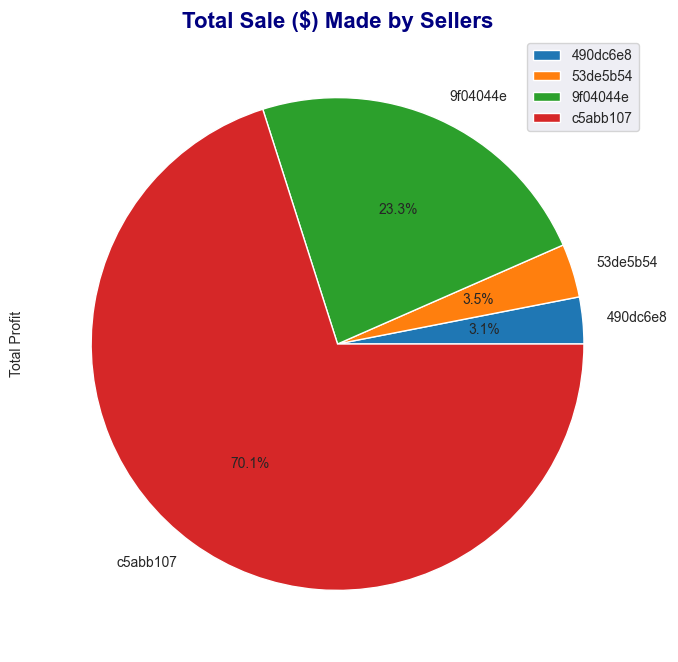

In [116]:
fig, ax = plt.subplots(figsize=(16,8))
sellers_by_sale.plot.pie(y='Total Profit', autopct='%.1f%%' , ax=ax)
ax.set_title('Total Sale ($) Made by Sellers',
             fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})

Based on the pie chart:
* c5abb107 made up 70.1% of all sales so far.
* 9f04044e is in the second place with 23.3%.
# Next question is: Why there is a huge difference in total sales made by sellers? 

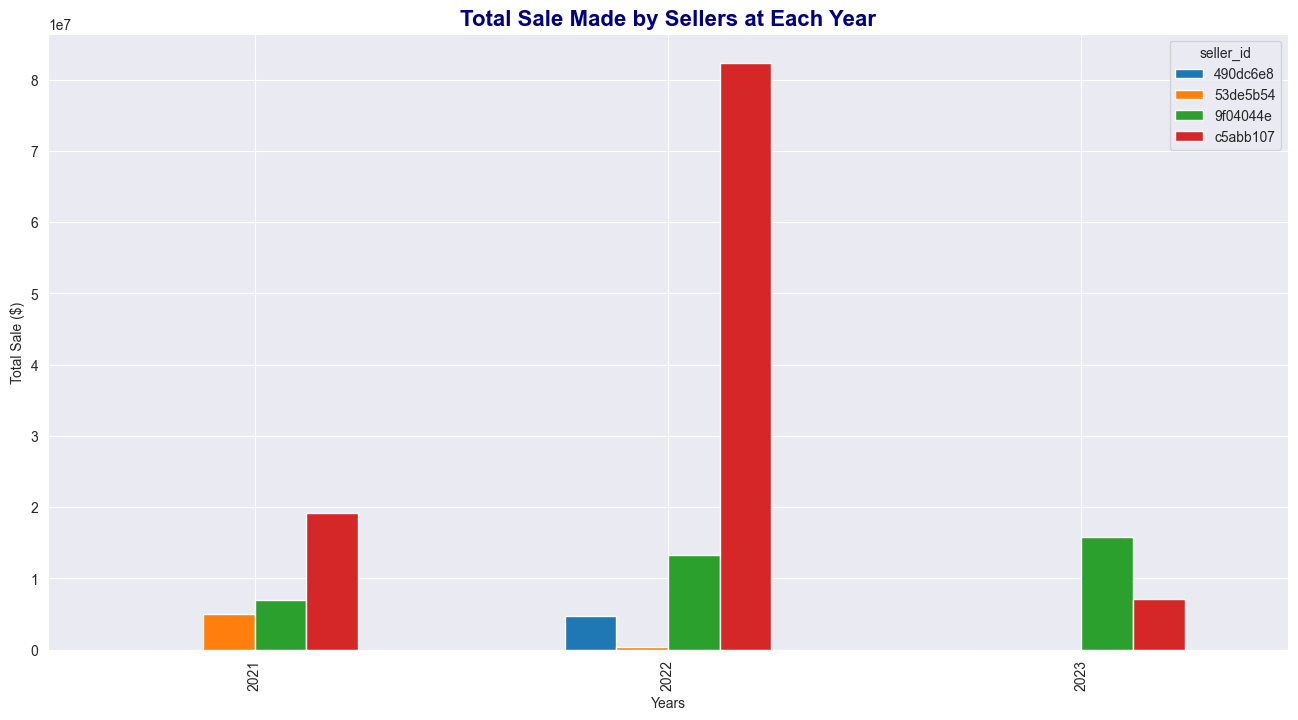

In [117]:
sellers_year.plot.bar(figsize=(16,8))
plt.title('Total Sale Made by Sellers at Each Year', 
          fontdict={'fontname':'Arial','fontsize':16,'fontweight':'bold','color':'navy'})
plt.xlabel('Years')
plt.ylabel('Total Sale ($)');

Well, the following facts can be drawn from the graph above:
* In 2021, there were only 3 sellers and c5abb107 was the leading seller with the highest number of sales.
* In 2022, a new seller started to operate, namely with ID 490dc6e8.
* In comparison with 2021, in 2022, seller 53de5b54 made much less sales, while other previous sellers obviously progressed over time, especially c5abb107.
* The sales made by c5abb107 is for unknown reasons really high, so why is that the case?
* In 2023, there were operating only 2 sellers, namely 9f04044e and c5abb107. It explains why the total sale of these sellers is much higher. However, c5abb107 made much less sales since 2021, as it was the lowest one for this seller, while 9f04044e as in previous year made a gradual progress upward.

In [118]:
sellers_df[(sellers_df.purchase_year == 2021)].groupby(['purchase_month','seller_id'])['total_price'].sum().unstack(fill_value=0)

seller_id       53de5b54  9f04044e  c5abb107
purchase_month                              
1                      0    107860    176850
2                      0    103700    370150
3                  58400    229350    494100
4                 151900    172640    476740
5                  30900    145870   1032570
6                 161500     83640    139220
7                 271650    694050    761580
8                  92000   1281890   3212260
9                 541300   1088330   3099020
10                873000   2056400   2251700
11               1058520    377250   4297230
12               1763580    620480   2944430

It looks like the seller with ID 53de5b54 started to operate in March.

In [119]:
sellers_df[(sellers_df.purchase_year == 2022)].groupby(['purchase_month','seller_id'])['total_price'].sum().unstack(fill_value=0)

seller_id       490dc6e8  53de5b54  9f04044e  c5abb107
purchase_month                                        
1                 728200         0    591300   7669080
2                2220380         0    933600   3417750
3                 370860         0    456850   7166520
4                 225350         0    227900   5503950
5                      0    165600    473000   7282750
6                      0         0   2066610   6036030
7                 751800    278940   3114580   4373600
8                  62600         0   2308570   5362950
9                 149400         0   1160550   5420930
10                 31200         0     61500   6573990
11                215500         0    738210   9277230
12                     0         0   1208400  14249970

The seller 53de5b54 worked only on May and July, while 490dc6e8 has been selling between January-April and July-November, skipping 3 months in total.
Possible explanation for c5abb107 success in 2022 could be:
1. Since there were times when only 3 sellers were operating most of the time, presumably, the worklode has been handled by c5abb107. It could explain the sudden increase in sale numbers for this seller.
2. However, it is almost unbelievable that only c5abb107 was working with clients, since there were other sellers too. Then the next assumption is c5abb107 had a high credibility and customers' trust on this seller was indeed at high level.
3. Another reason could be: c5abb107 worked non-stop; if we assume this seller has been working without taking any brakes, and getting sick or whatever, while others indeed had these 'brakes', then, obviously, this seller's high results could be justified. Without any further data this is, for now, all I can say. 

## Inferences and Conclusion

Based on the findings presented, it is evident that product 103 (ID) has consistently been the most popular product over the last three years, with the highest number of sales at each year, indicating the potential for continued growth and development of this product in the future. Additionally, products 125 and 133 (IDs) have also been consistently popular, indicating a need for increased marketing strategies to further promote these products and capitalize on their popularity. The findings suggest that product 133 (ID) may become a strong competitor to product 103 (ID) in the future, as it showed a significant increase in popularity at the beginning of 2023, with potential to surpass the sales record established by product 103 (ID). Overall, the findings provide important insights into the company's sales trends and product popularity, which can be used to guide their future strategies and decisions.

Furthermore, it is important to note that the sales of the company have shown significant growth over the last two years, with a sharp increase observed from June 2021 to December 2022. However, there was a sudden drop in sales at the beginning of 2023, which needs to be addressed by the company. Despite this, the sales graph shows a positive trend, with potential for continued growth in the future.

The list of the top 7 most popular products based on yearly sales analysis, as identified from the graph, can provide useful information to the company to prioritize their efforts on these products, as they are in high demand among customers. 

It is also worth noting that the cheapest product in the list did not show a consistent level of popularity over time, indicating that price alone does not determine customer preferences.

Other findings we have made:

- Customers tend to buy products in the range of 1-9 products at once, with the most common range being between 4-6 products.

- Purchase activity is not equally distributed through days, and there is a pattern of 'seven days' between each high activity purchase day. This suggests that purchases were made offline.

- Majority of purchases were made between 9th and 23rd Days of the month since 2021 January.

- c5abb107 is the leading seller with the highest number of sales, making up 70.1% of all sales so far.

- In 2022, a new seller started to operate, while the previous sellers made progress over time, especially c5abb107.

- The sudden increase in sales numbers for c5abb107 in 2022 could be due to a high workload, high credibility and customers' trust, or working non-stop.

- The lowest number of products sold since 2021 has not gone below 321, indicating a stable flow of customers.

Based on these findings, the company can take steps to improve customer retention and loyalty. For instance, they can focus on providing a wider range of products within the preferred range of 1-9 products. They can also identify the reasons behind c5abb107's success and leverage those factors to improve sales for other sellers. Additionally, the company can investigate the reasons behind the pattern of 'seven days' between high activity purchase days to better understand customer behavior and preferences.

# References and Future Works

During the analysis of this dataset,  Sales data from the company's internal database, covering the period from January 2021 to March 2023 was used to gain insights and knowledge about the Sales made between 2021-2023. These resource include the official website of Kaggle with the dataset located at:
https://www.kaggle.com/datasets/davidms8/product-sales-detail.


Based on the findings presented in this report, there are several areas where further research and analysis could be conducted to improve the company's sales performance and customer satisfaction. Some potential areas for future work are:

* Conducting customer surveys to gather feedback on product preferences, pricing, and quality, and using this information to develop new products or improve existing ones.
* Analyzing the customer retention rate to identify factors that influence customer loyalty and developing strategies to improve it.
* Investigating the reasons behind the pattern of 'seven days' between high activity purchase days, such as identifying specific days or events that trigger purchases, to optimize the company's marketing and sales strategies.
* Studying the factors that contribute to the success of the leading seller c5abb107, and identifying ways to replicate these factors for other sellers.
* Analyzing the market trends and competition regularly to stay informed about the latest developments and opportunities in the industry.
By conducting further research and analysis in these areas, the company can gain a deeper understanding of customer preferences and behavior, identify new opportunities for growth, and make informed decisions to stay ahead of the competition.